# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.3
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df_ = pd.read_parquet('2023-1.parquet')
df_.info()
df_.head()

# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
#!pip install pyarrow


# Select the folder having data files
#os.chdir('EDA/NYC Yellow taxi optimization assessment/Monthly data')
os.chdir(r'D:\upgrad\EDA\12 files of NYC yellow taxi data\Datasets and Dictionary\trip_records')
# Create a list of all the twelve files to read
file_list = os.listdir()

print("Files =",file_list)
# initialise an empty dataframe
df = pd.DataFrame() # final DataFrame to store all samples


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
       
        df_month = pd.read_parquet(file_path,engine='auto')
        


        # Reading the current file
        df_month['datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'].astype('datetime64[ns]'),errors="coerce")      
        df_month['date'] = df_month['datetime'].dt.date        # Just the date (YYYY-MM-DD)
        df_month['hour'] = df_month['datetime'].dt.hour        # Just the hour (0 to 23)


        df_month['date'] = pd.to_datetime(df_month['date'].astype('datetime64[ns]'),errors="coerce")
        #df_month['hour'] = pd.to_datetime(df_month['hour'].astype('datetime64[ns]'),errors="coerce")

                
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe
        for date in df_month['date'].dt.date.unique():
            sample = df_month[df_month['date'].dt.date == date]

            for hour in range(24):
                hour_data = sample[sample['date'].dt.hour == hour]
                if not hour_data.empty:
                    hour_data = hour_data.sample(frac=0.01, random_state=42)
                    sampled_data = pd.concat([sampled_data, hour_data])

        df = pd.concat([df, sampled_data])

        # Concatenate the sampled data of all the dates to a single dataframe
       # df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Files = ['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet', 'Samples File - 1pct', 'Samples File - 1pct.joblib', 'Samples File - 5%', 'Samples File - 5%.joblib', 'Samples File - 5pct', 'Samples File - 5pct.joblib']
Error reading file Samples File - 1pct.joblib: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file Samples File - 5%.joblib: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file Samples File - 5pct.joblib: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449524 entries, 51150 to 1888975
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               449524 non-null  int64         
 1   tpep_pickup_datetime   449524 non-null  datetime64[us]
 2   tpep_dropoff_datetime  449524 non-null  datetime64[us]
 3   passenger_count        435118 non-null  float64       
 4   trip_distance          449524 non-null  float64       
 5   RatecodeID             435118 non-null  float64       
 6   store_and_fwd_flag     435118 non-null  object        
 7   PULocationID           449524 non-null  int64         
 8   DOLocationID           449524 non-null  int64         
 9   payment_type           449524 non-null  int64         
 10  fare_amount            449524 non-null  float64       
 11  extra                  449524 non-null  float64       
 12  mta_tax                449524 non-null  floa

In [343]:
# Store the df in csv/parquet
# df.to_parquet('')

df.to_parquet('Samples File - 1pct', index=False)

In [344]:
df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           14406
trip_distance                 0
RatecodeID                14406
store_and_fwd_flag        14406
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      14406
airport_fee              386894
datetime                      0
date                          0
hour                          0
Airport_fee               77036
dtype: int64

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [345]:
# Load the new data file
from joblib import dump, load

sampled_df = pd.read_parquet('Samples File - 1pct')


# Save it
dump(sampled_df, r'D:\upgrad\EDA\12 files of NYC yellow taxi data\Datasets and Dictionary\trip_records\Samples File - 1pct.joblib')

# Load it later
#sampled_df = load('Samples File - 1%.joblib')

['D:\\upgrad\\EDA\\12 files of NYC yellow taxi data\\Datasets and Dictionary\\trip_records\\Samples File - 1pct.joblib']

In [346]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449524 entries, 0 to 449523
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               449524 non-null  int64         
 1   tpep_pickup_datetime   449524 non-null  datetime64[us]
 2   tpep_dropoff_datetime  449524 non-null  datetime64[us]
 3   passenger_count        435118 non-null  float64       
 4   trip_distance          449524 non-null  float64       
 5   RatecodeID             435118 non-null  float64       
 6   store_and_fwd_flag     435118 non-null  object        
 7   PULocationID           449524 non-null  int64         
 8   DOLocationID           449524 non-null  int64         
 9   payment_type           449524 non-null  int64         
 10  fare_amount            449524 non-null  float64       
 11  extra                  449524 non-null  float64       
 12  mta_tax                449524 non-null  floa

In [347]:
sampled_df.isna().sum()
#sampled_df.head()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           14406
trip_distance                 0
RatecodeID                14406
store_and_fwd_flag        14406
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      14406
airport_fee              386894
datetime                      0
date                          0
hour                          0
Airport_fee               77036
dtype: int64

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [348]:
# Fix the index and drop any columns that are not needed

sampled_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'datetime',
       'date', 'hour', 'Airport_fee'],
      dtype='object')

In [349]:
print(sampled_df[['Airport_fee', 'airport_fee']].describe())

         Airport_fee   airport_fee
count  372488.000000  62630.000000
mean        0.146774      0.106658
std         0.474668      0.349212
min        -1.750000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         0.000000      0.000000
max         1.750000      1.250000


In [350]:
sampled_df['Airport_fee'].isna().sum()*100/len(sampled_df)


17.137238501170128

In [351]:
sampled_df['airport_fee'].isna().sum()*100/len(sampled_df)

86.06748471716749

In [352]:
sampled_df['Airport_fee'] = sampled_df['Airport_fee'].fillna(0)


In [353]:
sampled_df['airport_fee'] = sampled_df['airport_fee'].fillna(0)

In [354]:
#sampled_df['tpep_pickup_datetime'] = pd.to_datetime(sampled_df['tpep_pickup_datetime'])
sampled_df['tpep_dropoff_datetime'] = pd.to_datetime(sampled_df['tpep_dropoff_datetime'])

# Calculate duration in minutes and add as new column
sampled_df['trip_duration'] = (sampled_df['tpep_dropoff_datetime'] - sampled_df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [355]:
sampled_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'datetime',
       'date', 'hour', 'Airport_fee', 'trip_duration'],
      dtype='object')

In [356]:
sampled_df = sampled_df.drop(columns=['tpep_pickup_datetime', 'datetime'])
sampled_df.columns

Index(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'date', 'hour', 'Airport_fee',
       'trip_duration'],
      dtype='object')

In [357]:
cols=list(sampled_df.columns)
last_second=cols[-2]
last_third=cols[-3]

cols.remove(last_second)
cols.remove(last_third)

cols.insert(1,last_third)
cols.insert(2,last_second)

sampled_df=sampled_df[cols]

sampled_df.columns

Index(['VendorID', 'hour', 'Airport_fee', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date',
       'trip_duration'],
      dtype='object')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [358]:
# Combine the two airport fee columns

sampled_df['airport_fee'].describe()

count    449524.000000
mean          0.014860
std           0.135478
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.250000
Name: airport_fee, dtype: float64

In [359]:
sampled_df['Airport_fee'].describe()

count    449524.000000
mean          0.121621
std           0.435611
min          -1.750000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.750000
Name: Airport_fee, dtype: float64

In [360]:
sampled_df['total_airport_fee']=sampled_df['Airport_fee']+sampled_df['airport_fee']


In [361]:
sampled_df['total_airport_fee'].describe()

count    449524.000000
mean          0.136481
std           0.452213
min          -1.750000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.750000
Name: total_airport_fee, dtype: float64

In [362]:
sampled_df = sampled_df.drop(columns=['airport_fee', 'Airport_fee'])
sampled_df.columns

Index(['VendorID', 'hour', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'trip_duration', 'total_airport_fee'],
      dtype='object')

In [363]:
sampled_df.isna().sum()

VendorID                     0
hour                         0
tpep_dropoff_datetime        0
passenger_count          14406
trip_distance                0
RatecodeID               14406
store_and_fwd_flag       14406
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     14406
date                         0
trip_duration                0
total_airport_fee            0
dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [365]:
# check where values of fare amount are negative

numeric_df = sampled_df.select_dtypes(include='number')


negative_counts = (numeric_df < 0).sum()

print(negative_counts)

VendorID                  0
hour                      0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     0
mta_tax                  17
tip_amount                0
tolls_amount              0
improvement_surcharge    20
total_amount             20
congestion_surcharge     12
trip_duration            22
total_airport_fee         5
dtype: int64


Did you notice something different in the `RatecodeID` column for above records?

In [366]:
# Analyse RatecodeID for the negative fare amounts

#sampled_data['RatecodeID'].describe()
print((sampled_data['RatecodeID']<0).sum())

0


In [367]:
# Find which columns have negative values

columns_with_negatives = negative_counts[negative_counts > 0]
total_rows=len(sampled_df)
percentage=(columns_with_negatives*100)/total_rows
print("percentage of negative counts is")
print(percentage)
print(columns_with_negatives)
print(total_rows)

percentage of negative counts is
mta_tax                  0.003782
improvement_surcharge    0.004449
total_amount             0.004449
congestion_surcharge     0.002669
trip_duration            0.004894
total_airport_fee        0.001112
dtype: float64
mta_tax                  17
improvement_surcharge    20
total_amount             20
congestion_surcharge     12
trip_duration            22
total_airport_fee         5
dtype: int64
449524


In [368]:
# fix these negative values
numeric_cols = sampled_df.select_dtypes(include='number').columns
sampled_df[numeric_cols] = sampled_df[numeric_cols].mask(sampled_df[numeric_cols] < 0, np.nan)
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449524 entries, 0 to 449523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               449524 non-null  int64         
 1   hour                   449524 non-null  int32         
 2   tpep_dropoff_datetime  449524 non-null  datetime64[us]
 3   passenger_count        435118 non-null  float64       
 4   trip_distance          449524 non-null  float64       
 5   RatecodeID             435118 non-null  float64       
 6   store_and_fwd_flag     435118 non-null  object        
 7   PULocationID           449524 non-null  int64         
 8   DOLocationID           449524 non-null  int64         
 9   payment_type           449524 non-null  int64         
 10  fare_amount            449524 non-null  float64       
 11  extra                  449524 non-null  float64       
 12  mta_tax                449507 non-null  floa

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [369]:
# Find the proportion of missing values in each column
sampled_df.isna().sum()
#print(missing_proportion)


VendorID                     0
hour                         0
tpep_dropoff_datetime        0
passenger_count          14406
trip_distance                0
RatecodeID               14406
store_and_fwd_flag       14406
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                     17
tip_amount                   0
tolls_amount                 0
improvement_surcharge       20
total_amount                20
congestion_surcharge     14418
date                         0
trip_duration               22
total_airport_fee            5
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [370]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
null_passenger = sampled_df['passenger_count'].isna().sum()
print(f"Number of null entries in 'passenger_count': {null_passenger}")

median_passenger=sampled_df['passenger_count'].median()
print(f"Median of entries in 'passenger_count': {median_passenger}")

sampled_df['passenger_count']=sampled_df['passenger_count'].fillna(median_passenger)


Number of null entries in 'passenger_count': 14406
Median of entries in 'passenger_count': 1.0


In [371]:
sampled_df['passenger_count'].isna().sum()

0

Did you find zeroes in passenger_count? Handle these.

In [372]:
zero_passenger=(sampled_df['passenger_count']==0).sum()
print(f"Zero entries in 'passenger_count': {zero_passenger}")
print(f"Percentage of zero entries in 'passenger_count': {(zero_passenger*100/len(sampled_df)).round(2)}%, hence we may drop this small number of rows.")
Total=len(sampled_df)
print(f"Total entries in sampled data is: {Total}")

Zero entries in 'passenger_count': 6907
Percentage of zero entries in 'passenger_count': 1.54%, hence we may drop this small number of rows.
Total entries in sampled data is: 449524


In [373]:
sampled_df=sampled_df[sampled_df['passenger_count']>0]
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442617 entries, 0 to 449523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               442617 non-null  int64         
 1   hour                   442617 non-null  int32         
 2   tpep_dropoff_datetime  442617 non-null  datetime64[us]
 3   passenger_count        442617 non-null  float64       
 4   trip_distance          442617 non-null  float64       
 5   RatecodeID             428211 non-null  float64       
 6   store_and_fwd_flag     428211 non-null  object        
 7   PULocationID           442617 non-null  int64         
 8   DOLocationID           442617 non-null  int64         
 9   payment_type           442617 non-null  int64         
 10  fare_amount            442617 non-null  float64       
 11  extra                  442617 non-null  float64       
 12  mta_tax                442600 non-null  float64  

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [374]:
# Fix missing values in 'RatecodeID'
sampled_df['RatecodeID'].isna().sum()

14406

In [375]:
#Nan_RatecodeID = sampled_df['RatecodeID'].isna().sum()
print(f"Number of null entries in 'RatecodeID': {sampled_df['RatecodeID'].isna().sum()}")
print(f"Percentage of null entries in 'RatecodeID': {(sampled_df['RatecodeID'].isna().sum())*100/len(sampled_df)}% .")
counts_RatecodeID=sampled_df['RatecodeID'].value_counts()
print(f"Value counts of entries in 'RatecodeID': {counts_RatecodeID} .")

#Droping RatecodeID with 99 and replace NaN values with 1 (i.e the usual ratecode ID as per data).
sampled_df=sampled_df[sampled_df['RatecodeID']!=99]
sampled_df['RatecodeID']=sampled_df['RatecodeID'].fillna(1)

Number of zero entries in 'RatecodeID': 14406
Percentage of zero entries in 'RatecodeID': 3.2547326469611426% .
Value counts of entries in 'RatecodeID': RatecodeID
1.0     404203
2.0      16737
99.0      2497
5.0       2400
3.0       1480
4.0        893
6.0          1
Name: count, dtype: int64 .


In [376]:
print(f"Value counts after cleaning data of entries in 'RatecodeID': {sampled_df['RatecodeID'].value_counts()} .")

Value counts after cleaning data of entries in 'RatecodeID': RatecodeID
1.0    418609
2.0     16737
5.0      2400
3.0      1480
4.0       893
6.0         1
Name: count, dtype: int64 .


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [378]:
# handle null values in congestion_surcharge

print(f"The count of null values in congestion_surcharge is:{sampled_df['congestion_surcharge'].isna().sum()}")
print(f"The mean of congestion_surcharge is:{sampled_df['congestion_surcharge'].mean().round(2)}")
print(f"The median of congestion_surcharge is:{sampled_df['congestion_surcharge'].median()}")

#replacing NaN valued by 2.5

sampled_df['congestion_surcharge']=sampled_df['congestion_surcharge'].fillna(2.5)


The count of null values in congestion_surcharge is:14418
The mean of congestion_surcharge is:2.32
The median of congestion_surcharge is:2.5


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [379]:
# Handle any remaining missing values
sampled_df.isna().sum()

VendorID                     0
hour                         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       14406
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                     17
tip_amount                   0
tolls_amount                 0
improvement_surcharge       20
total_amount                20
congestion_surcharge         0
date                         0
trip_duration               20
total_airport_fee            5
dtype: int64

In [380]:
N_count = sampled_df[sampled_df['store_and_fwd_flag'] == "N"].shape[0]
Y_count = sampled_df[sampled_df['store_and_fwd_flag'] == "Y"].shape[0]
Null_count = sampled_df['store_and_fwd_flag'].isna().sum()

# Total
Total_store_and_fwd_flag = N_count + Y_count + Null_count

print(f"N: {N_count}")
print(f"Y: {Y_count}")
print(f"Null: {Null_count}")
print(f"Total: {Total_store_and_fwd_flag}")

N: 423337
Y: 2377
Null: 14406
Total: 440120


In [381]:
# FOllowing the trend, we will replace the null entries by "N" in store_and_fwd_flag.

sampled_df['store_and_fwd_flag']=sampled_df['store_and_fwd_flag'].fillna("N")

In [382]:
print(f"N: {sampled_df[sampled_df['store_and_fwd_flag'] == "N"].shape[0]}")
print(f"Y: {sampled_df[sampled_df['store_and_fwd_flag'] == "Y"].shape[0]}")
print(f"Null: {sampled_df['store_and_fwd_flag'].isna().sum()}")

N: 437743
Y: 2377
Null: 0


In [383]:
# As there are very few (Neglegible) number of rows in mta_tax , improvement_surcharge, total_amount and total_airport_fee  we will drop those rows.
sampled_df = sampled_df.dropna()

In [384]:
sampled_df.isna().sum()

VendorID                 0
hour                     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
trip_duration            0
total_airport_fee        0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

<class 'pandas.core.frame.DataFrame'>
Index: 440080 entries, 0 to 449523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               440080 non-null  int64         
 1   hour                   440080 non-null  int32         
 2   tpep_dropoff_datetime  440080 non-null  datetime64[us]
 3   passenger_count        440080 non-null  float64       
 4   trip_distance          440080 non-null  float64       
 5   RatecodeID             440080 non-null  float64       
 6   store_and_fwd_flag     440080 non-null  object        
 7   PULocationID           440080 non-null  int64         
 8   DOLocationID           440080 non-null  int64         
 9   payment_type           440080 non-null  int64         
 10  fare_amount            440080 non-null  float64       
 11  extra                  440080 non-null  float64       
 12  mta_tax                440080 non-null  float64  

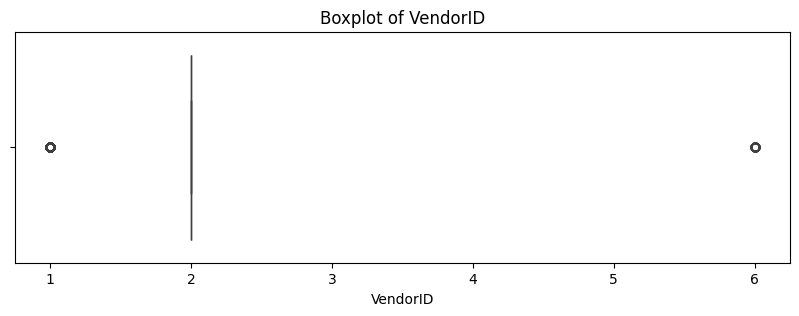

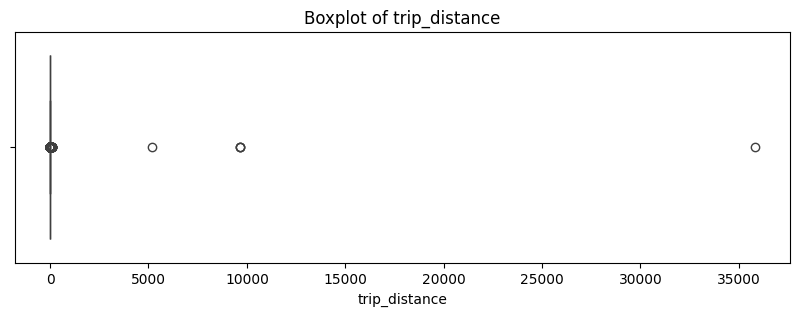

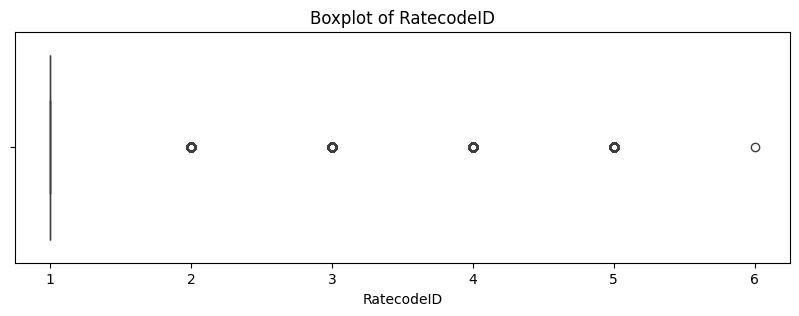

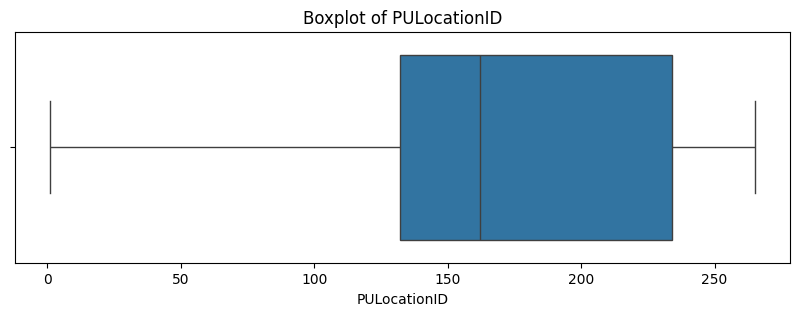

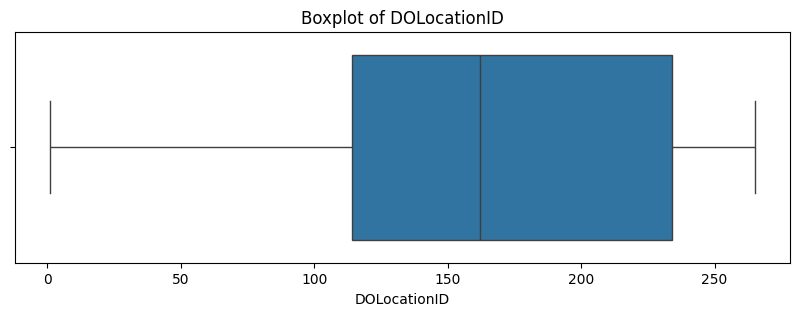

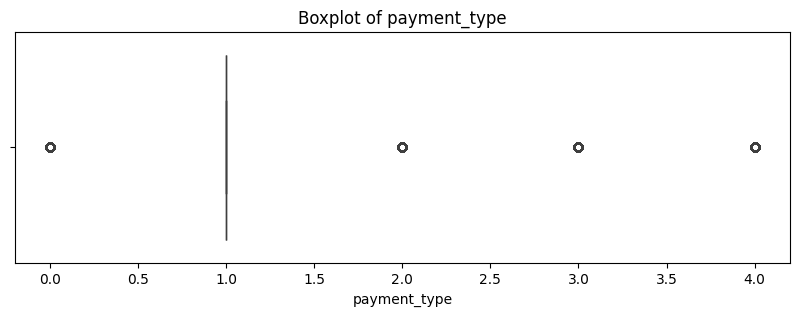

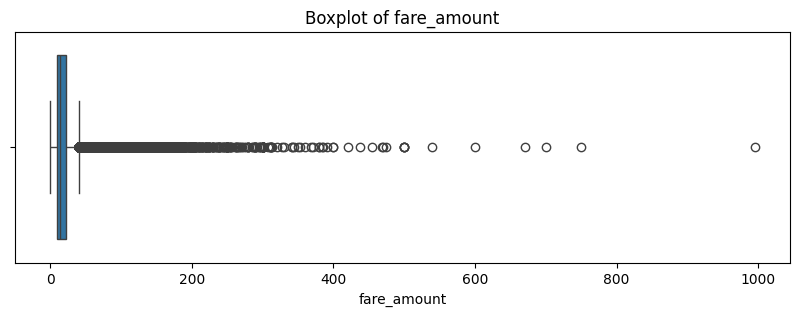

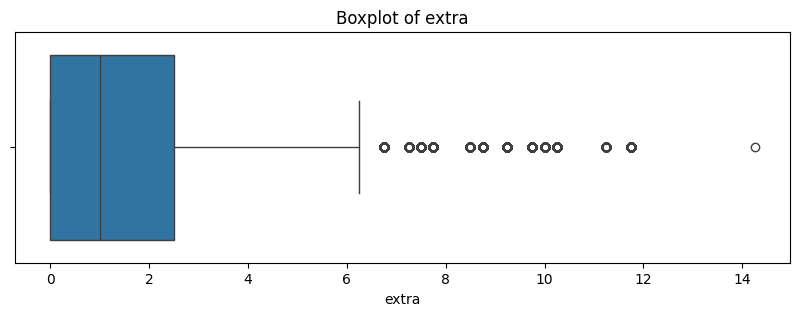

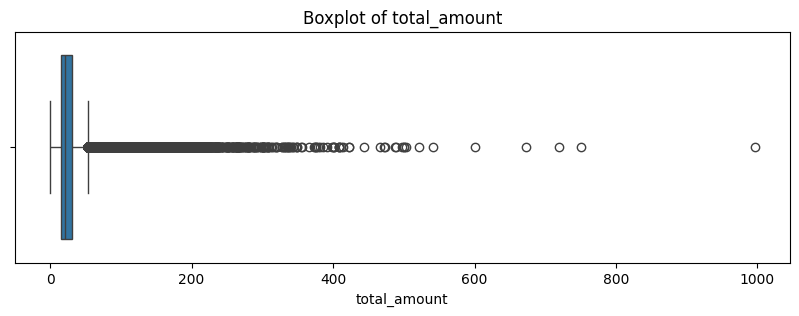

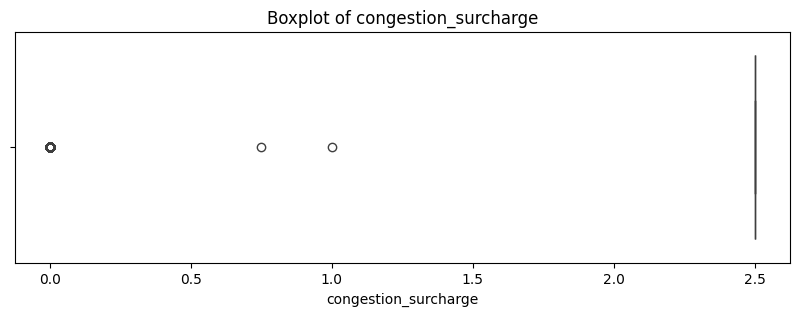

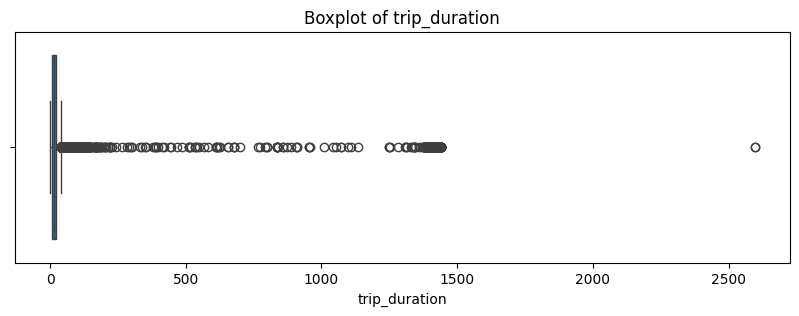

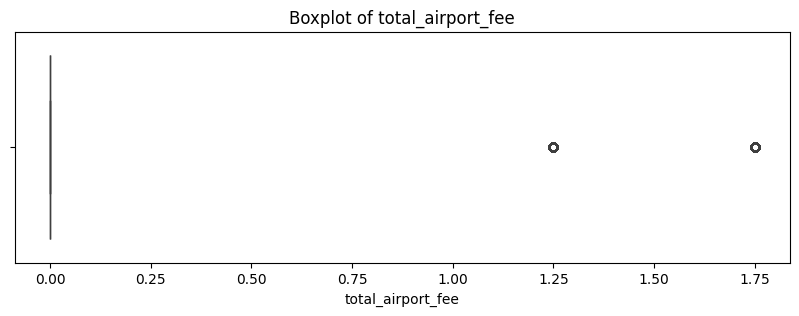

In [385]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

sampled_df.info()

numeric_cols = sampled_df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=sampled_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [386]:
sampled_df['date'].value_counts()

date
2023-01-26    2356
2023-01-19    2348
2023-01-14    2326
2023-01-27    2294
2023-01-28    2290
              ... 
2023-12-25     486
2023-09-21     451
2023-09-23      63
2023-09-24      54
2023-09-22      50
Name: count, Length: 365, dtype: int64

In [387]:
#sampled_df['hour'] = pd.to_datetime(sampled_df['hour'], errors='coerce').dt.hour

sampled_df['hour'].value_counts()

hour
18    30780
17    29541
19    27634
15    27613
16    27372
14    27310
13    25734
21    24119
12    24099
20    24045
22    22578
11    21724
10    20069
9     18642
23    17885
8     16581
0     13209
7     12236
1      8893
6      5790
2      5676
3      3660
4      2450
5      2440
Name: count, dtype: int64

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [388]:
# remove passenger_count > 6
sampled_df.columns

Index(['VendorID', 'hour', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'trip_duration', 'total_airport_fee'],
      dtype='object')

In [389]:
sampled_df['passenger_count'].value_counts()

passenger_count
1.0    339767
2.0     65317
3.0     16248
4.0      9121
5.0      5810
6.0      3810
8.0         4
7.0         2
9.0         1
Name: count, dtype: int64

In [390]:
sampled_df = sampled_df[sampled_df['passenger_count'] < 7]

In [391]:
sampled_df['passenger_count'].value_counts()

passenger_count
1.0    339767
2.0     65317
3.0     16248
4.0      9121
5.0      5810
6.0      3810
Name: count, dtype: int64

In [392]:
# Continue with outlier handling
sampled_df.groupby('trip_distance')['fare_amount'].count()

trip_distance
0.00        7812
0.01         301
0.02         180
0.03         166
0.04         119
            ... 
120.28         1
5156.70        1
9673.55        1
9674.84        2
35802.34       1
Name: fare_amount, Length: 3118, dtype: int64

In [393]:
sorted_df = sampled_df[(sampled_df['trip_distance'] >= 0) & (sampled_df['trip_distance'] < 1)] \
                      .sort_values(by='trip_distance')
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98189 entries, 449514 to 151720
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               98189 non-null  int64         
 1   hour                   98189 non-null  int32         
 2   tpep_dropoff_datetime  98189 non-null  datetime64[us]
 3   passenger_count        98189 non-null  float64       
 4   trip_distance          98189 non-null  float64       
 5   RatecodeID             98189 non-null  float64       
 6   store_and_fwd_flag     98189 non-null  object        
 7   PULocationID           98189 non-null  int64         
 8   DOLocationID           98189 non-null  int64         
 9   payment_type           98189 non-null  int64         
 10  fare_amount            98189 non-null  float64       
 11  extra                  98189 non-null  float64       
 12  mta_tax                98189 non-null  float64       
 13  

In [394]:
sorted_df.groupby('trip_distance')['fare_amount'].value_counts()

trip_distance  fare_amount
0.00           3.00           1362
               70.00           392
               3.70            149
               6.83             92
               23.00            91
                              ... 
0.99           25.00             1
               25.40             1
               26.10             1
               27.50             1
               70.00             1
Name: count, Length: 4763, dtype: int64

In [395]:
sorted_df.groupby('fare_amount')['trip_distance'].value_counts()

fare_amount  trip_distance
0.0          0.00             62
             0.10              7
             0.20              3
             0.70              3
             0.02              2
                              ..
500.0        0.71              1
540.0        0.00              1
600.0        0.00              1
750.0        0.00              1
995.0        0.00              1
Name: count, Length: 4763, dtype: int64

In [396]:
sampled_df=sampled_df[sampled_df['trip_distance']>0]

In [397]:
sampled_df=sampled_df[(sampled_df['fare_amount']>0) & (sampled_df['fare_amount']<=300)]

In [398]:
print('Values count for trip_distance')
sampled_df['trip_distance'].value_counts()


Values count for trip_distance


trip_distance
1.00     5764
0.90     5707
0.80     5550
1.10     5500
1.20     5358
         ... 
23.16       1
28.18       1
61.50       1
34.16       1
52.18       1
Name: count, Length: 3090, dtype: int64

In [399]:
print('Values count for fare_amount')
sampled_df['fare_amount'].value_counts()

Values count for fare_amount


fare_amount
8.60     19570
9.30     19340
10.00    19198
7.90     19171
10.70    18693
         ...  
16.66        1
64.19        1
0.46         1
44.15        1
37.15        1
Name: count, Length: 3960, dtype: int64

In [400]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432171 entries, 0 to 449523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               432171 non-null  int64         
 1   hour                   432171 non-null  int32         
 2   tpep_dropoff_datetime  432171 non-null  datetime64[us]
 3   passenger_count        432171 non-null  float64       
 4   trip_distance          432171 non-null  float64       
 5   RatecodeID             432171 non-null  float64       
 6   store_and_fwd_flag     432171 non-null  object        
 7   PULocationID           432171 non-null  int64         
 8   DOLocationID           432171 non-null  int64         
 9   payment_type           432171 non-null  int64         
 10  fare_amount            432171 non-null  float64       
 11  extra                  432171 non-null  float64       
 12  mta_tax                432171 non-null  float64  

In [401]:
# Do any columns need standardising?

sampled_df[numeric_cols].std()

VendorID                  0.432464
hour                      5.817827
passenger_count           0.878211
trip_distance            60.798144
RatecodeID                0.328506
PULocationID             63.855402
DOLocationID             69.819057
payment_type              0.489599
fare_amount              17.623991
extra                     1.819692
mta_tax                   0.040841
tip_amount                3.968954
tolls_amount              2.175177
improvement_surcharge     0.019786
total_amount             22.327651
congestion_surcharge      0.618003
trip_duration            39.769104
total_airport_fee         0.455769
dtype: float64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [402]:
sampled_df.columns.tolist()

['VendorID',
 'hour',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'trip_duration',
 'total_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [403]:
numerical_cols = []
categorical_cols = []
datetime_cols = []

for col in sampled_df.columns:
    if pd.api.types.is_numeric_dtype(sampled_df[col]):
        numerical_cols.append(col)
    elif pd.api.types.is_datetime64_any_dtype(sampled_df[col]):
        datetime_cols.append(col)
    else:
        categorical_cols.append(col)


print("Numerical columns:")
print(numerical_cols)

print("\nCategorical columns:")
print(categorical_cols)

print("\nDatetime columns:")
print(datetime_cols)


Numerical columns:
['VendorID', 'hour', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'trip_duration', 'total_airport_fee']

Categorical columns:
['store_and_fwd_flag']

Datetime columns:
['tpep_dropoff_datetime', 'date']


In [404]:
for col in numerical_cols:
    print(sampled_df[col].value_counts())


VendorID
2    327146
1    104949
6        76
Name: count, dtype: int64
hour
18    30299
17    29055
19    27189
15    27176
16    26911
14    26865
13    25350
12    23748
21    23721
20    23652
22    22127
11    21406
10    19794
9     18387
23    17426
8     16247
0     12884
7     11991
1      8625
6      5641
2      5500
3      3508
5      2343
4      2326
Name: count, dtype: int64
passenger_count
1.0    332863
2.0     64712
3.0     16082
4.0      8931
5.0      5786
6.0      3797
Name: count, dtype: int64
trip_distance
1.00     5764
0.90     5707
0.80     5550
1.10     5500
1.20     5358
         ... 
23.16       1
28.18       1
61.50       1
34.16       1
52.18       1
Name: count, Length: 3090, dtype: int64
RatecodeID
1.0    412399
2.0     16357
3.0      1392
5.0      1157
4.0       865
6.0         1
Name: count, dtype: int64
PULocationID
132    22385
237    20784
161    20148
236    18235
162    15340
       ...  
200        1
165        1
60         1
117        1
222        1

In [405]:
###
# Categorise the varaibles into Numerical or Categorical.

# VendorID: Categorical
# tpep_pickup_datetime: Date time - Numerical
# tpep_dropoff_datetime: Date time - Numerical
# passenger_count:Categorical
# trip_distance: Numerical
# RatecodeID:Categorical
# PULocationID: Numerical
# DOLocationID: Numerical
# payment_type:Categorical
# pickup_hour:Categorical
# trip_duration: Numerical
# The following monetary parameters belong in the same category, is it categorical or numerical?

# fare_amount: Numerical
# extra: Numerical
# mta_tax: Numerical
# tip_amount: Numerical
# tolls_amount: Categorical
# improvement_surcharge: Categorical
# total_amount: Numerical
# congestion_surcharge: Categorical
# airport_fee: Numerical

###

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [406]:
# Find and show the hourly trends in taxi pickups

hourly_pickups = sampled_df.groupby('hour').size().reset_index(name='pickup_count')

hourly_pickups.head(24)

hour  pickup_count
0      0         12884
1      1          8625
2      2          5500
3      3          3508
4      4          2326
5      5          2343
6      6          5641
7      7         11991
8      8         16247
9      9         18387
10    10         19794
11    11         21406
12    12         23748
13    13         25350
14    14         26865
15    15         27176
16    16         26911
17    17         29055
18    18         30299
19    19         27189
20    20         23652
21    21         23721
22    22         22127
23    23         17426

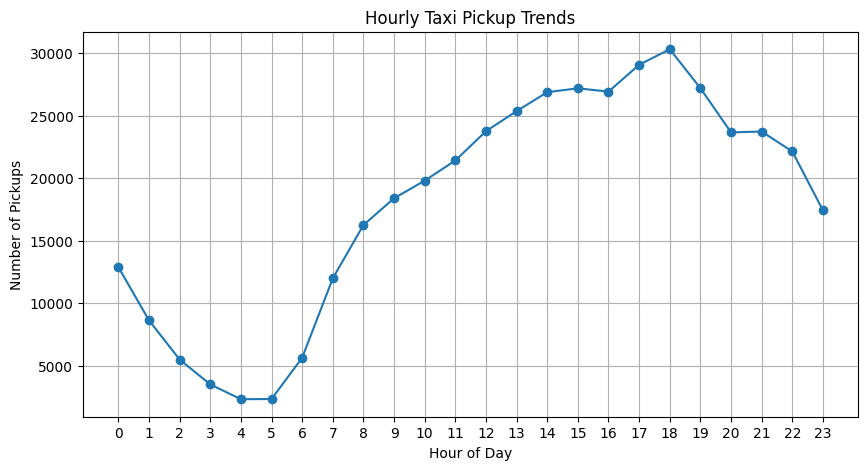

In [601]:
plt.figure(figsize=(10,5))
plt.plot(hourly_pickups['hour'], hourly_pickups['pickup_count'], marker='o')
plt.title('Hourly Taxi Pickup Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))  # Show all hours on the x-axis
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                365 non-null    datetime64[ns]
 1   daily_pickup_count  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


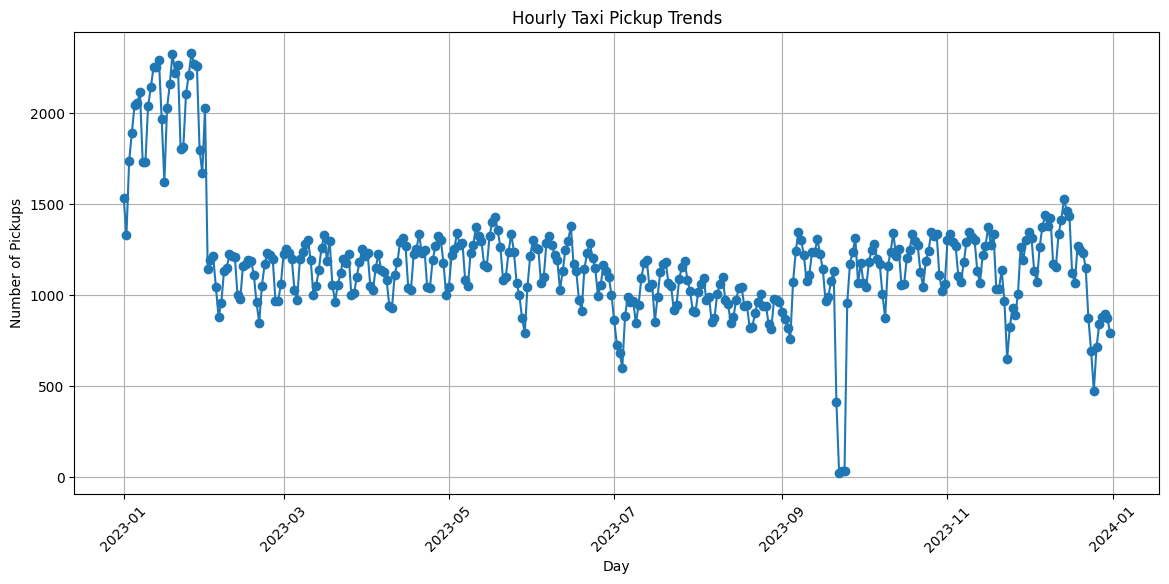

In [408]:
# Find and show the daily trends in taxi pickups (days of the week)

daily_pickups = sampled_df.groupby('date').size().reset_index(name='daily_pickup_count')

daily_pickups['date'] = pd.to_datetime(daily_pickups['date'])
daily_pickups = daily_pickups.sort_values('date')

daily_pickups.info()
plt.figure(figsize=(14,6))
plt.plot(daily_pickups['date'], daily_pickups['daily_pickup_count'], marker='o')
plt.title('Hourly Taxi Pickup Trends')
plt.xlabel('Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

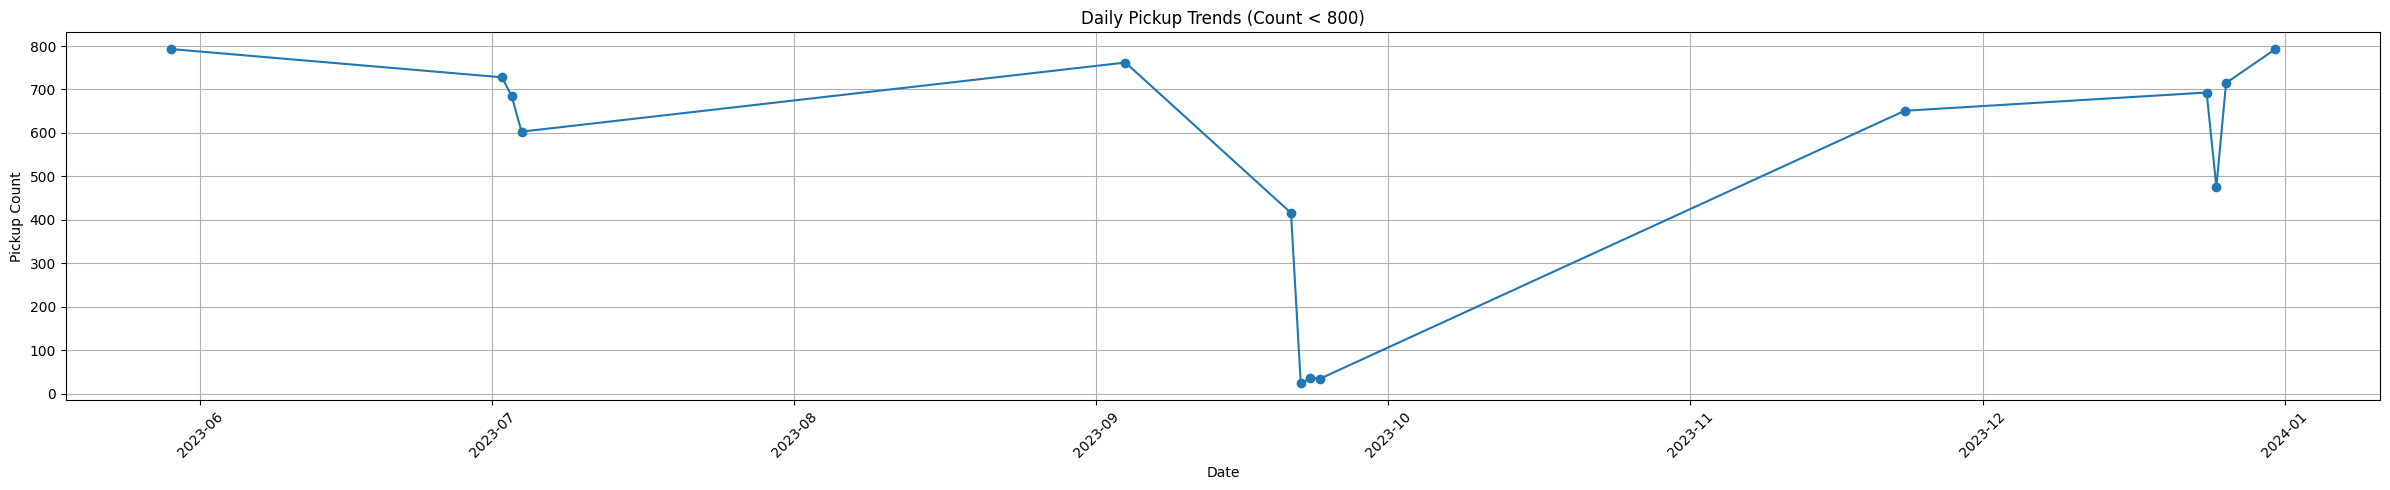

In [409]:
filtered = daily_pickups[daily_pickups['daily_pickup_count'] < 800]

plt.figure(figsize=(24, 5))
plt.plot(filtered['date'], filtered['daily_pickup_count'], marker='o', linestyle='-')
plt.title('Daily Pickup Trends (Count < 800)')
plt.xlabel('Date')
plt.ylabel('Pickup Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


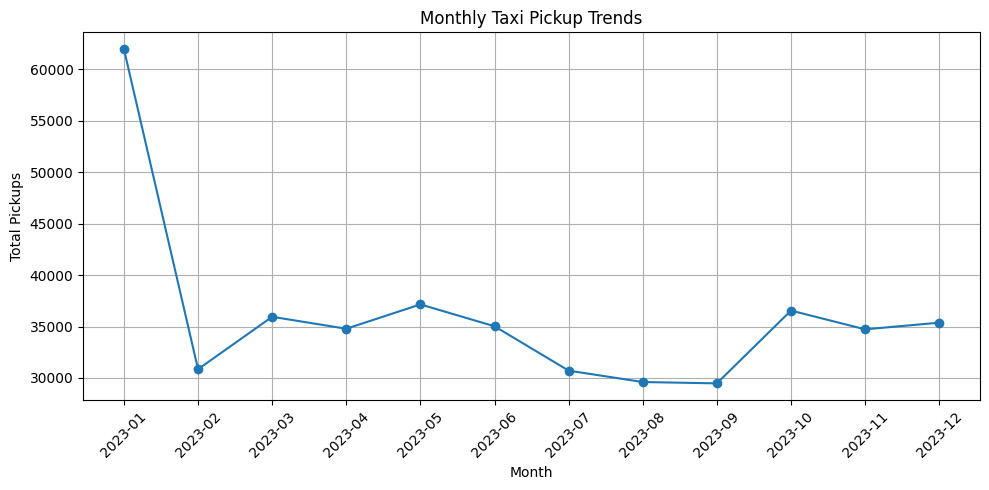

In [410]:
# Show the monthly trends in pickups
daily_pickups['month'] = daily_pickups['date'].dt.to_period('M').astype(str)
monthly_pickups = daily_pickups.groupby('month')['daily_pickup_count'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(monthly_pickups['month'], monthly_pickups['daily_pickup_count'], marker='o', linestyle='-')
plt.title('Monthly Taxi Pickup Trends')
plt.xlabel('Month')
plt.ylabel('Total Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [411]:
# Analyse the above parameters

numeric_cols = sampled_df.select_dtypes(include='number')

negative_counts = (numeric_cols < 0).sum()  #negatives
print("Number of negative values per column:")
print(negative_counts)


zero_counts = (numeric_cols == 0).sum() #Zero
print("\nNumber of zero values per column:")
print(zero_counts)

Number of negative values per column:
VendorID                 0
hour                     0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
trip_duration            0
total_airport_fee        0
dtype: int64

Number of zero values per column:
VendorID                      0
hour                      12884
passenger_count               0
trip_distance                 0
RatecodeID                    0
PULocationID                  0
DOLocationID                  0
payment_type              11272
fare_amount                   0
extra                    172373
mta_tax                    2847
tip_amount                92457
tolls_amount             397025
improvement_

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [412]:
# Create a df with non zero entries for the selected parameters.

sampled_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 432171 entries, 0 to 449523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               432171 non-null  int64         
 1   hour                   432171 non-null  int32         
 2   tpep_dropoff_datetime  432171 non-null  datetime64[us]
 3   passenger_count        432171 non-null  float64       
 4   trip_distance          432171 non-null  float64       
 5   RatecodeID             432171 non-null  float64       
 6   store_and_fwd_flag     432171 non-null  object        
 7   PULocationID           432171 non-null  int64         
 8   DOLocationID           432171 non-null  int64         
 9   payment_type           432171 non-null  int64         
 10  fare_amount            432171 non-null  float64       
 11  extra                  432171 non-null  float64       
 12  mta_tax                432171 non-null  float64  

In [413]:
sampled_df=sampled_df[sampled_df['tip_amount']>0]
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339714 entries, 0 to 449523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               339714 non-null  int64         
 1   hour                   339714 non-null  int32         
 2   tpep_dropoff_datetime  339714 non-null  datetime64[us]
 3   passenger_count        339714 non-null  float64       
 4   trip_distance          339714 non-null  float64       
 5   RatecodeID             339714 non-null  float64       
 6   store_and_fwd_flag     339714 non-null  object        
 7   PULocationID           339714 non-null  int64         
 8   DOLocationID           339714 non-null  int64         
 9   payment_type           339714 non-null  int64         
 10  fare_amount            339714 non-null  float64       
 11  extra                  339714 non-null  float64       
 12  mta_tax                339714 non-null  float64  

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

      month  total_amount
0   2023-01    1377752.22
1   2023-02     689164.54
2   2023-03     831487.49
3   2023-04     810260.33
4   2023-05     883369.36
5   2023-06     834821.79
6   2023-07     689553.27
7   2023-08     676301.55
8   2023-09     722130.83
9   2023-10     890484.14
10  2023-11     837455.22
11  2023-12     823104.01


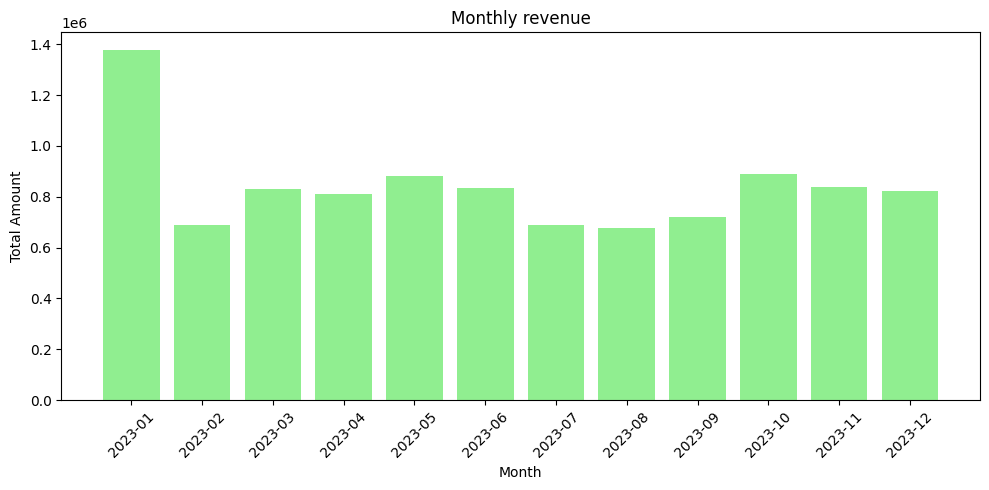

In [414]:
# Group data by month and analyse monthly revenue


sampled_df['month'] = sampled_df['date'].dt.to_period('M').astype(str)

monthly_total = sampled_df.groupby('month')['total_amount'].sum().reset_index()


print(monthly_total)


plt.figure(figsize=(10,5))
plt.bar(monthly_total['month'], monthly_total['total_amount'], color='lightgreen')
plt.title('Monthly revenue')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  quarter  total_amount
0  2023Q1    2898404.25
1  2023Q2    2528451.48
2  2023Q3    2087985.65
3  2023Q4    2551043.37


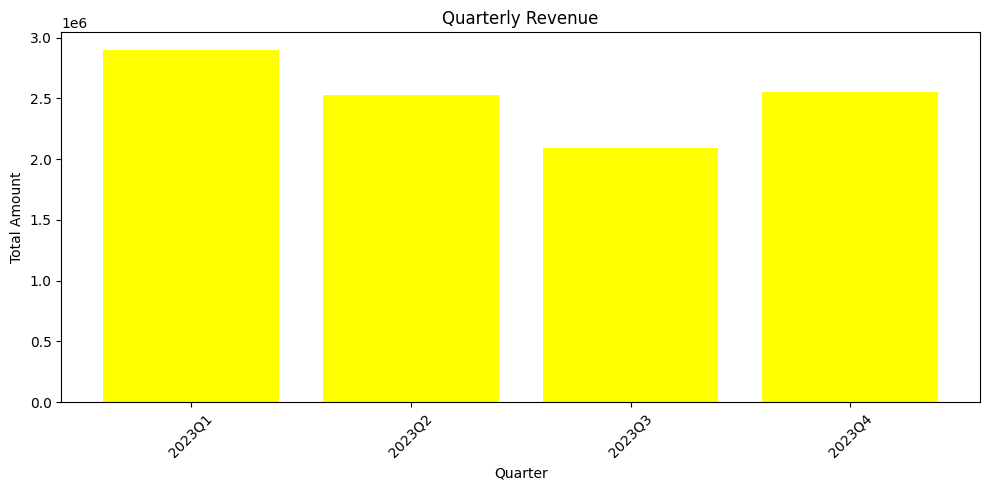

In [415]:
# Calculate proportion of each quarter
sampled_df['quarter'] = sampled_df['date'].dt.to_period('Q').astype(str)

quarterly_total = sampled_df.groupby('quarter')['total_amount'].sum().reset_index()
print(quarterly_total)


plt.figure(figsize=(10, 5)) 
plt.bar(quarterly_total['quarter'], quarterly_total['total_amount'], color='yellow')
plt.title('Quarterly Revenue')
plt.xlabel('Quarter')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

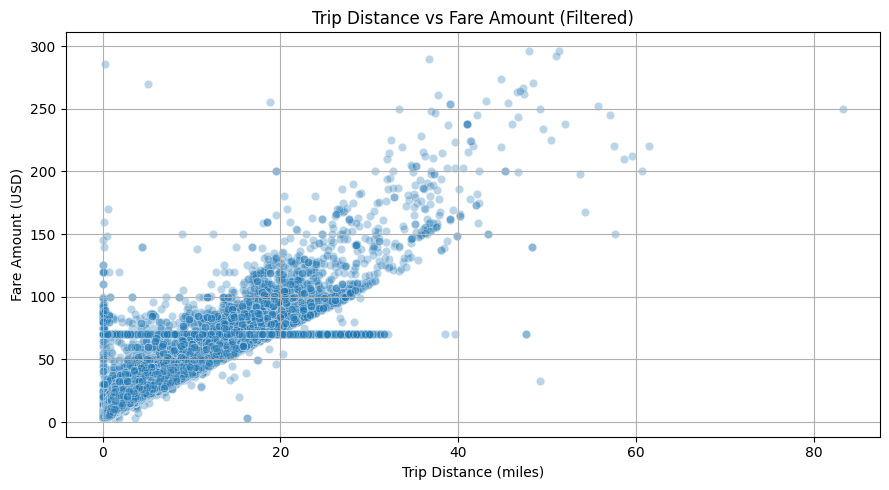

In [602]:
# Show how trip fare is affected by distance
filtered_df_trip_amount = sampled_df[
    (sampled_df['trip_distance'] > 0) & 
    (sampled_df['trip_distance'] < 100) & 
    (sampled_df['fare_amount'] > 0) & 
    (sampled_df['fare_amount'] < 300)]

plt.figure(figsize=(9, 5))
sns.scatterplot(data=filtered_df_trip_amount, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Trip Distance vs Fare Amount (Filtered)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [417]:
# Show relationship between fare and trip duration
sampled_df['trip_duration'].describe()


count    339714.000000
mean         16.846408
std          33.084549
min           0.000000
25%           7.816667
50%          12.683333
75%          20.350000
max        1439.266667
Name: trip_duration, dtype: float64

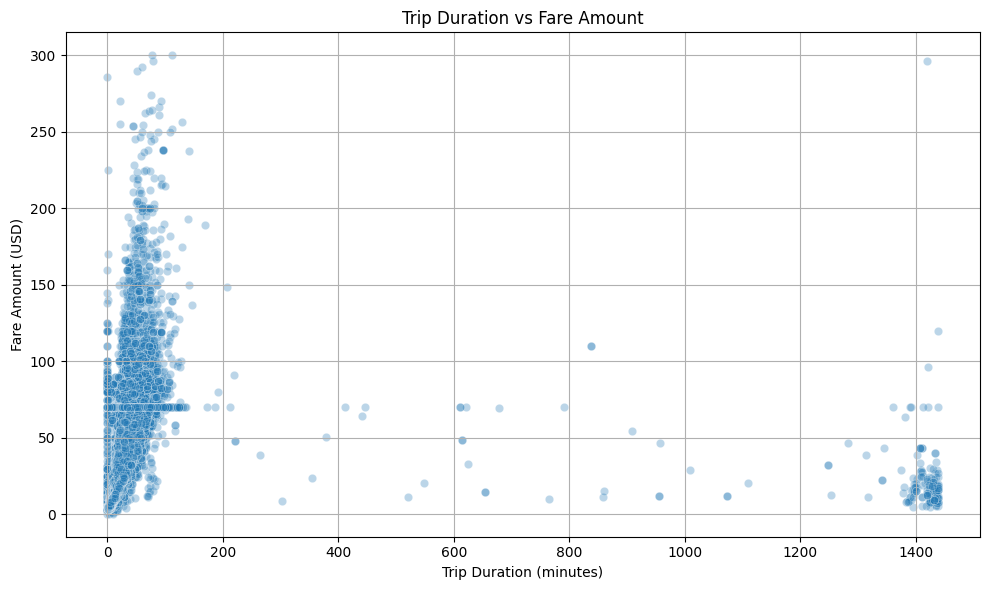

In [418]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title('Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

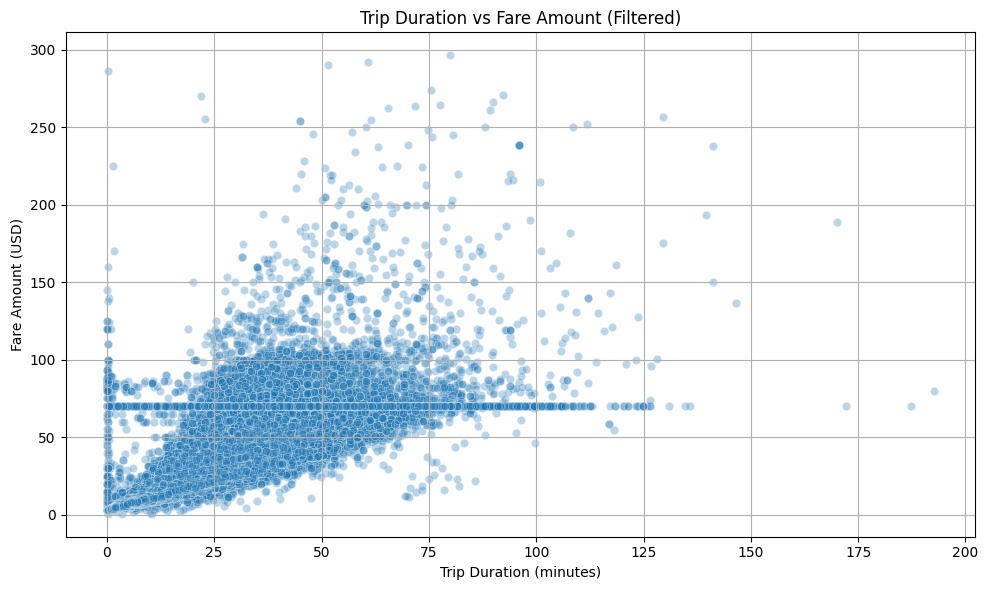

In [419]:
filtered_df_duration_amount = sampled_df[
    (sampled_df['trip_duration'] > 0) & 
    (sampled_df['trip_duration'] < 200) & 
    (sampled_df['fare_amount'] > 0) & 
    (sampled_df['fare_amount'] < 300)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df_duration_amount, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title('Trip Duration vs Fare Amount (Filtered)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

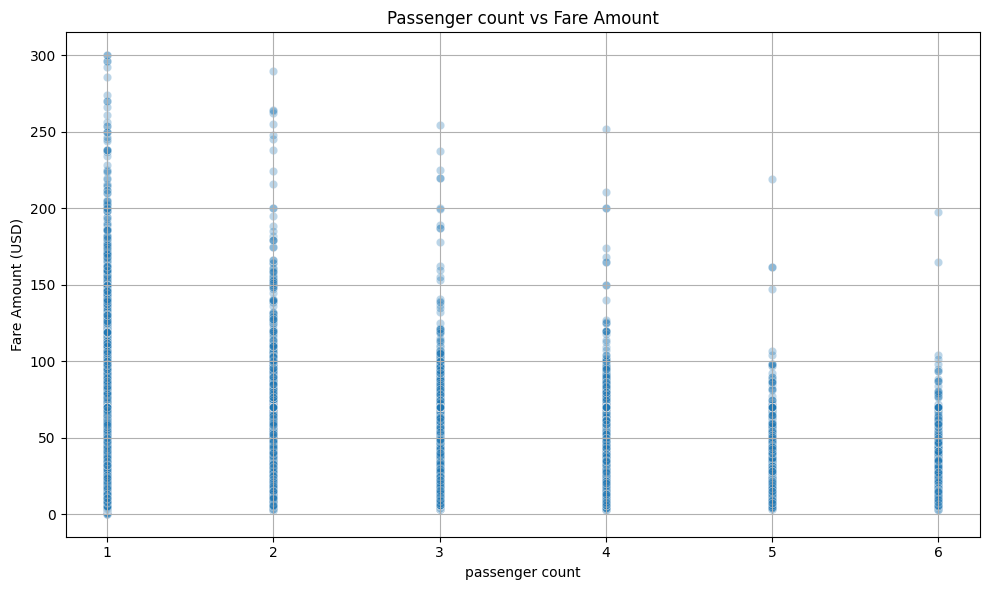

In [420]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df, x='passenger_count', y='fare_amount', alpha=0.3)
plt.title('Passenger count vs Fare Amount')
plt.xlabel('passenger count')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [421]:
# Show relationship between tip and trip distance

sampled_df['trip_distance'].describe()

count    339714.000000
mean          3.662496
std          68.526268
min           0.010000
25%           1.100000
50%           1.830000
75%           3.410000
max       35802.340000
Name: trip_distance, dtype: float64

In [422]:
sampled_df['tip_amount'].describe()

count    339714.000000
mean          4.579302
std           3.943805
min           0.010000
25%           2.380000
50%           3.400000
75%           5.000000
max          99.990000
Name: tip_amount, dtype: float64

In [423]:
filtered_df_tip_distance = sampled_df[
    (sampled_df['trip_distance'] > 0) & 
    (sampled_df['trip_distance'] < 200) & 
    (sampled_df['tip_amount'] > 0) & 
    (sampled_df['tip_amount'] < 100)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df_tip_distance, x='tip_amount', y='trip_distance', alpha=0.3)
plt.title('Tip V/S Distance (Filtered)')
plt.xlabel('Tip amount (USD)')
plt.ylabel('Distance (Miles)')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [424]:
# Analyse the distribution of different payment types (payment_type).

sampled_df=sampled_df[sampled_df['payment_type']>0]

payment_counts = sampled_df['payment_type'].value_counts()


payment_percent = sampled_df['payment_type'].value_counts(normalize=True) * 100



print("Payment Type Counts:\n", payment_counts)
print("\nPayment Type Percentages:\n", payment_percent.round(2))

plt.figure(figsize=(10, 5))
sns.countplot(data=sampled_df, x='payment_type', palette='pastel')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Payment Type Counts:
 payment_type
1    330923
2         9
4         6
3         3
Name: count, dtype: int64

Payment Type Percentages:
 payment_type
1    99.99
2     0.00
4     0.00
3     0.00
Name: proportion, dtype: float64


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [425]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [426]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
#zones = # read the .shp file using gpd
zones=gpd.read_file(r"D:\upgrad\EDA\12 files of NYC yellow taxi data\Datasets and Dictionary\taxi_zones\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


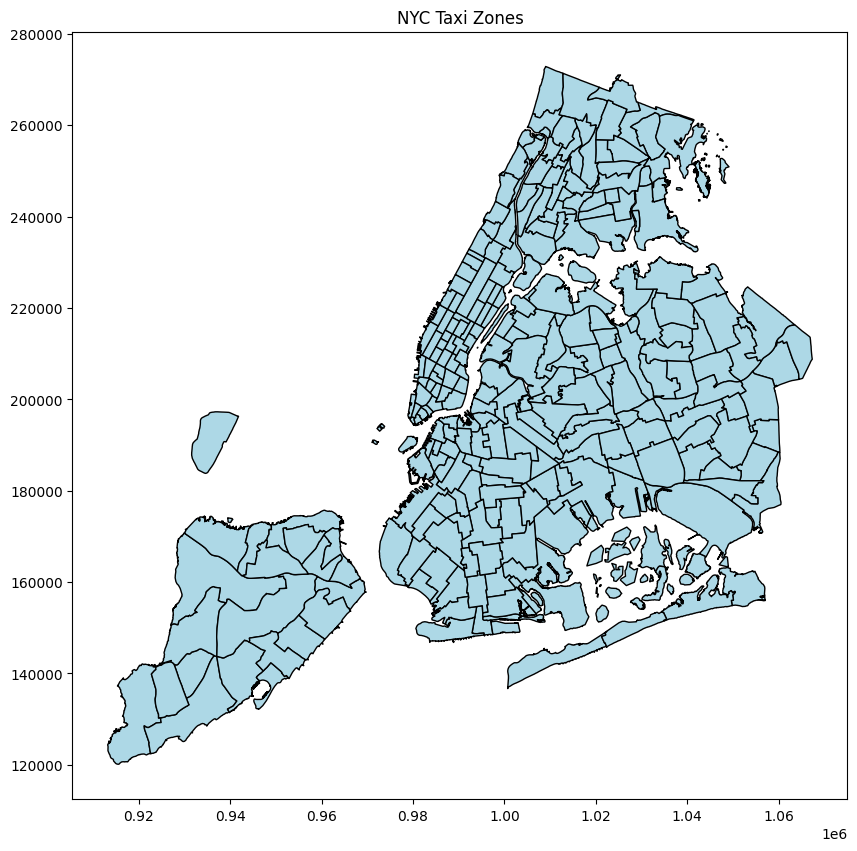

In [427]:
# print(zones.info())
# zones.plot()

print(zones.info())

fig, ax = plt.subplots(figsize=(10, 10))
zones.plot(ax=ax, edgecolor='black', color='lightblue')
plt.title("NYC Taxi Zones")
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [428]:
# Merge zones and trip records using locationID and PULocationID
zones.columns
print("Value counts in location iD is:",zones['LocationID'].value_counts())
print("\nNull values in location iD is:",zones['LocationID'].isna().sum())


Value counts in location iD is: LocationID
103    3
56     2
1      1
176    1
181    1
      ..
94     1
95     1
96     1
97     1
263    1
Name: count, Length: 260, dtype: int64

Null values in location iD is: 0


In [429]:
zones['LocationID'].describe()

count    263.000000
mean     131.984791
std       76.073787
min        1.000000
25%       66.500000
50%      132.000000
75%      197.500000
max      263.000000
Name: LocationID, dtype: float64

In [430]:
sampled_df['PULocationID'].describe()

count    330941.000000
mean        166.730182
std          63.448545
min           1.000000
25%         132.000000
50%         162.000000
75%         234.000000
max         265.000000
Name: PULocationID, dtype: float64

In [431]:
zones.info

<bound method DataFrame.info of      OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough             

In [432]:
merged_df = sampled_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330953 entries, 0 to 330952
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               330953 non-null  int64         
 1   hour                   330953 non-null  int32         
 2   tpep_dropoff_datetime  330953 non-null  datetime64[us]
 3   passenger_count        330953 non-null  float64       
 4   trip_distance          330953 non-null  float64       
 5   RatecodeID             330953 non-null  float64       
 6   store_and_fwd_flag     330953 non-null  object        
 7   PULocationID           330953 non-null  int64         
 8   DOLocationID           330953 non-null  int64         
 9   payment_type           330953 non-null  int64         
 10  fare_amount            330953 non-null  float64       
 11  extra                  330953 non-null  float64       
 12  mta_tax                330953 non-null  floa

In [433]:
merged_df.isna().sum()

VendorID                    0
hour                        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
date                        0
trip_duration               0
total_airport_fee           0
month                       0
quarter                     0
OBJECTID                 3024
Shape_Leng               3024
Shape_Area               3024
zone                     3024
LocationID               3024
borough                  3024
geometry                 3024
dtype: int64

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [434]:
# Group data by location and calculate the number of trips

LocationID_counts = merged_df.groupby('LocationID').size().reset_index(name='trip_count')
print(LocationID_counts)



     LocationID  trip_count
0           1.0           7
1           2.0           2
2           3.0           1
3           4.0         322
4           7.0          77
..          ...         ...
169       259.0           1
170       260.0          28
171       261.0        1630
172       262.0        4447
173       263.0        6651

[174 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [435]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_counts = zones.merge(LocationID_counts, on='LocationID', how='left')


zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0).astype(int)


print(zones_with_counts[['LocationID', 'zone', 'trip_count']].head())

zones_with_counts['trip_count'].max()

   LocationID                     zone  trip_count
0           1           Newark Airport           7
1           2              Jamaica Bay           2
2           3  Allerton/Pelham Gardens           1
3           4            Alphabet City         322
4           5            Arden Heights           0


16506

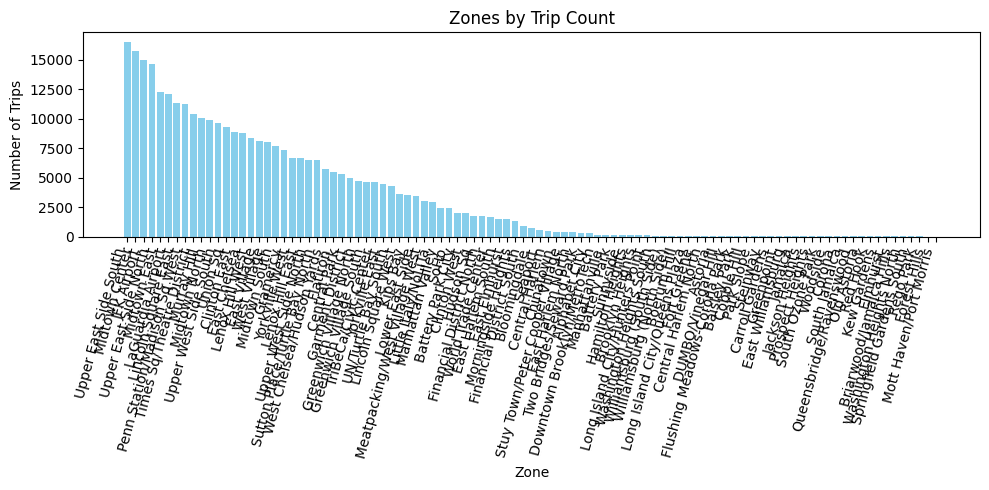

In [603]:
zones_sorted = zones_with_counts.sort_values(by='trip_count', ascending=False)

top_zones = zones_sorted.head(100)

plt.figure(figsize=(10, 5))
plt.bar(top_zones['zone'], top_zones['trip_count'], color='skyblue')
plt.xticks(rotation=75, ha='right')
plt.title('Zones by Trip Count')
plt.xlabel('Zone')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

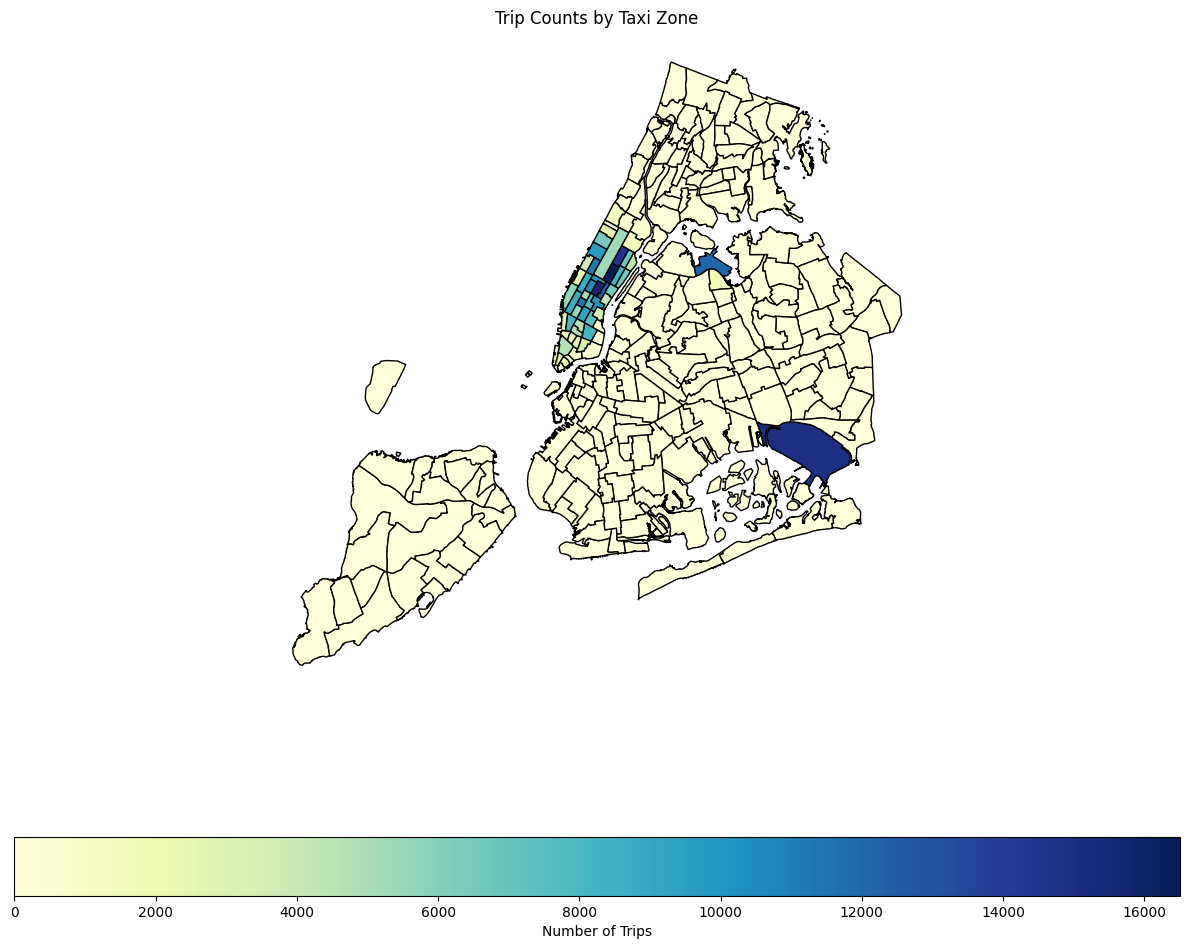

In [437]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize = (12, 10))


# Plot the map and display it

zones_with_counts.plot(
    column='trip_count',                # The data column to color by
    ax=ax,                              # Matplotlib axis to plot on
    legend=True,                        # Show color scale (legend)
    legend_kwds={
        'label': "Number of Trips",     # Label for color scale
        'orientation': "horizontal"     # Orientation: "horizontal" or "vertical"
    },
    cmap='YlGnBu',                        # Optional: color map (e.g., 'OrRd', 'viridis')
    edgecolor='black'                   # Optional: draw borders
)

ax.set_title("Trip Counts by Taxi Zone")
ax.axis("off")  # Hide the axis for a clean map
plt.tight_layout()
plt.show()



In [438]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted.head(20)

OBJECTID  Shape_Leng  Shape_Area                          zone  \
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
131       132    0.245479    0.002038                   JFK Airport   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
141       142    0.038176    0.000076           Lincoln Square East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
169       170    0.045769    0.000074                   Murray Hill   
162       163    0.034177    0.000041                 Midtown North   
238       239    0.063626    0.000205         Upper West Side South   
233       234    0.036072    0.000073                      Union Sq   
47         48    0.043747    0.000094                  Clinton East   
67         68    0.049337    0.000111                  East Chelsea   
140       141    0.041514    0.000077               Lenox Hill West   
78         79    0.042625    0.000108                  East Village   
248       249    0.036384    0.000072                  West Village   
163       164    0.035772    0.000056                 Midtown South   
106       107    0.038041    0.000075                      Gramercy   

     LocationID    borough                                           geometry  \
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   
162         163  Manhattan  POLYGON ((989412.663 219020.943, 990045.841 21...   
238         239  Manhattan  POLYGON ((991168.979 226252.992, 991955.565 22...   
233         234  Manhattan  POLYGON ((987029.847 207022.299, 987048.27 206...   
47           48  Manhattan  POLYGON ((986694.313 214463.846, 986568.184 21...   
67           68  Manhattan  POLYGON ((983690.405 209040.369, 983550.612 20...   
140         141  Manhattan  POLYGON ((994839.073 216123.698, 994786.74 216...   
78           79  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...   
248         249  Manhattan  POLYGON ((983555.319 204876.901, 983469.158 20...   
163         164  Manhattan  POLYGON ((988787.425 210315.593, 988662.868 21...   
106         107  Manhattan  POLYGON ((989131.643 205749.904, 989084.531 20...   

     trip_count  
236       16506  
160       15756  
131       14989  
235       14656  
161       12269  
137       12067  
141       11304  
185       11230  
229       10381  
169       10103  
162        9884  
238        9642  
233        9260  
47         8880  
67         8789  
140        8387  
78         8132  
248        8037  
163        7663  
106        7361

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [439]:
# Find routes which have the slowest speeds at different times of the day
zones_with_counts.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
 7   trip_count  263 non-null    int32   
dtypes: float64(2), geometry(1), int32(3), object(2)
memory usage: 13.5+ KB


In [440]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330953 entries, 0 to 330952
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               330953 non-null  int64         
 1   hour                   330953 non-null  int32         
 2   tpep_dropoff_datetime  330953 non-null  datetime64[us]
 3   passenger_count        330953 non-null  float64       
 4   trip_distance          330953 non-null  float64       
 5   RatecodeID             330953 non-null  float64       
 6   store_and_fwd_flag     330953 non-null  object        
 7   PULocationID           330953 non-null  int64         
 8   DOLocationID           330953 non-null  int64         
 9   payment_type           330953 non-null  int64         
 10  fare_amount            330953 non-null  float64       
 11  extra                  330953 non-null  float64       
 12  mta_tax                330953 non-null  floa

In [441]:
merged_df['speed']=merged_df['trip_distance']/merged_df['trip_duration']
print("Speed is calculated in units: miles/minute")
merged_df['speed'].head(20)

Speed is calculated in units: miles/minute


0     0.193388
1     0.255670
2     0.472015
3     0.181818
4     0.226214
5     0.173913
6     0.532686
7     0.523675
8     0.306569
9     0.429412
10    0.148662
11    0.408987
12    0.177841
13    0.128878
14    0.168782
15    0.173576
16    0.301898
17    0.434191
18    0.158463
19    0.226829
Name: speed, dtype: float64

How does identifying high-traffic, high-demand routes help us?

In [442]:
sort_merged_df=merged_df.sort_values(by=['speed', 'zone'], ascending=[False, False])
sort_merged_df=sort_merged_df[sort_merged_df['trip_duration']>0]
sort_merged_df['zone']=sort_merged_df['zone'].fillna(0)
sort_merged_df=sort_merged_df[sort_merged_df['zone']!=0]
sort_merged_df[['speed','zone']].head(40)

speed                           zone
274447  733.771176                  Midtown South
314966  623.512782            Morningside Heights
329667  623.512782            Morningside Heights
170004  243.600000               Manhattan Valley
57211   216.000000              Battery Park City
968     194.400000           Flatbush/Ditmas Park
279837  194.400000           Flatbush/Ditmas Park
121092  164.100000                Jackson Heights
88811   132.000000                Lenox Hill West
245739   74.210526       Washington Heights North
78873    68.666667                Lenox Hill West
115204   37.400000                   West Village
130637   36.000000      Times Sq/Theatre District
238546   26.890909                  East Elmhurst
179764   21.600000                 Midtown Center
4260     21.000000        Two Bridges/Seward Park
283129   21.000000        Two Bridges/Seward Park
251775   20.823529                    JFK Airport
198621   16.800000                    JFK Airport
78555    15.133333                   Midtown East
132431   14.400000                   Clinton East
194526   14.000000                       Union Sq
57281    13.350000              LaGuardia Airport
220032   11.630769       Financial District North
195351    9.600000                    JFK Airport
92319     8.400000               South Ozone Park
270742    8.200000                    JFK Airport
263490    7.892308           TriBeCa/Civic Center
67501     7.800000                    JFK Airport
121186    6.450000                    JFK Airport
230745    6.420000                   East Chelsea
135373    6.000000                    JFK Airport
143435    5.700000           TriBeCa/Civic Center
267806    5.027027                Lenox Hill East
26184     4.344828      Times Sq/Theatre District
156168    4.333333            Little Italy/NoLiTa
309156    3.500000  Sutton Place/Turtle Bay North
323857    3.500000  Sutton Place/Turtle Bay North
236197    2.794886              LaGuardia Airport
145381    2.769231               South Ozone Park

In [443]:
zone_trip_sorted=zones_with_counts.sort_values(by=['trip_count', 'zone'], ascending=[False, False])
zone_trip_sorted[['trip_count', 'zone']].head(40)

trip_count                           zone
236       16506          Upper East Side South
160       15756                 Midtown Center
131       14989                    JFK Airport
235       14656          Upper East Side North
161       12269                   Midtown East
137       12067              LaGuardia Airport
141       11304            Lincoln Square East
185       11230   Penn Station/Madison Sq West
229       10381      Times Sq/Theatre District
169       10103                    Murray Hill
162        9884                  Midtown North
238        9642          Upper West Side South
233        9260                       Union Sq
47         8880                   Clinton East
67         8789                   East Chelsea
140        8387                Lenox Hill West
78         8132                   East Village
248        8037                   West Village
163        7663                  Midtown South
106        7361                       Gramercy
262        6651                 Yorkville West
139        6642                Lenox Hill East
237        6515          Upper West Side North
228        6488  Sutton Place/Turtle Bay North
245        5698      West Chelsea/Hudson Yards
89         5502                       Flatiron
42         5291                   Central Park
99         4979               Garment District
112        4697        Greenwich Village North
113        4673        Greenwich Village South
230        4670           TriBeCa/Civic Center
261        4447                 Yorkville East
232        4273            UN/Turtle Bay South
142        3623            Lincoln Square West
136        3508                       Kips Bay
147        3408                Lower East Side
157        3022  Meatpacking/West Village West
143        2980            Little Italy/NoLiTa
150        2463               Manhattan Valley
210        2457                           SoHo

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [444]:
# Visualise the number of trips per hour and find the busiest hour

hourly_count=sort_merged_df.groupby('hour').size().reset_index(name='hourly_trip_count')

hourly_sorted_trip=hourly_count.sort_values(by=['hourly_trip_count','hour'], ascending=[False, False])
hourly_sorted_trip[['hour','hourly_trip_count']].head(5)
#hourly_sorted_trip[['hour','hourly_trip_count']].max()

hour  hourly_trip_count
18    18              23693
17    17              22358
19    19              21471
16    16              20147
15    15              20034

In [445]:
hourly_sorted_trip['hourly_trip_count'].max()

23693

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [446]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.01
sampled_trips=zones_with_counts['trip_count'].sum()


total_trips=sampled_trips/sample_fraction
print("total number of trips\n:",total_trips)
print("\nSampled trips\n:",sampled_trips)



total number of trips
: 32795300.0

Sampled trips
: 327953


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [447]:
# Compare traffic trends for the week days and weekends
merged_df['day_name'] = merged_df['date'].dt.day_name()
merged_df.columns


Index(['VendorID', 'hour', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'trip_duration', 'total_airport_fee',
       'month', 'quarter', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'LocationID', 'borough', 'geometry', 'speed', 'day_name'],
      dtype='object')

In [448]:
day_trip_counts = merged_df['day_name'].value_counts().reset_index()
day_trip_counts.columns = ['day_name', 'trip_count']


merged_df = merged_df.merge(day_trip_counts, on='day_name', how='left')


# merged_df = merged_df.rename(columns={'trip_count_y': 'trip_count'})
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330953 entries, 0 to 330952
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               330953 non-null  int64         
 1   hour                   330953 non-null  int32         
 2   tpep_dropoff_datetime  330953 non-null  datetime64[us]
 3   passenger_count        330953 non-null  float64       
 4   trip_distance          330953 non-null  float64       
 5   RatecodeID             330953 non-null  float64       
 6   store_and_fwd_flag     330953 non-null  object        
 7   PULocationID           330953 non-null  int64         
 8   DOLocationID           330953 non-null  int64         
 9   payment_type           330953 non-null  int64         
 10  fare_amount            330953 non-null  float64       
 11  extra                  330953 non-null  float64       
 12  mta_tax                330953 non-null  floa

In [450]:
merged_df[['day_name','trip_count']].value_counts()

day_name   trip_count
Thursday   52562         52562
Wednesday  51055         51055
Tuesday    48843         48843
Friday     48782         48782
Saturday   47613         47613
Sunday     41216         41216
Monday     40882         40882
Name: count, dtype: int64

In [451]:
day_hour_trip=merged_df[['day_name','hour','trip_count']].value_counts()
day_hour_trip.head(40)

day_name   hour  trip_count
Thursday   18    52562         4054
Wednesday  18    51055         3947
Tuesday    18    48843         3766
Thursday   17    52562         3663
           19    52562         3610
Wednesday  17    51055         3548
           19    51055         3485
Tuesday    17    48843         3473
Friday     18    48782         3464
           17    48782         3394
Thursday   21    52562         3381
Friday     19    48782         3364
Tuesday    19    48843         3333
Wednesday  21    51055         3266
           20    51055         3240
Thursday   15    52562         3191
Monday     18    40882         3190
Tuesday    21    48843         3170
Wednesday  14    51055         3120
Tuesday    16    48843         3119
Thursday   20    52562         3106
           16    52562         3062
Wednesday  16    51055         3053
Tuesday    15    48843         3033
Thursday   22    52562         3030
Tuesday    20    48843         3013
Wednesday  15    51055         3002


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [452]:
# Find top 10 pickup and dropoff zones

merged_df.columns

Index(['VendorID', 'hour', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'trip_duration', 'total_airport_fee',
       'month', 'quarter', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'LocationID', 'borough', 'geometry', 'speed', 'day_name', 'trip_count'],
      dtype='object')

In [453]:
merged_df['dropoff_hour'] = merged_df['tpep_dropoff_datetime'].dt.floor('H')

merged_df['pickup_hour'] = merged_df['dropoff_hour'] - pd.to_timedelta(merged_df['trip_duration'], unit='h')



In [454]:
pick_drop_zone = merged_df[['zone', 'dropoff_hour','pickup_hour' , 'speed']].value_counts()
pick_drop_zone.head(10)

zone                     dropoff_hour         pickup_hour                    speed   
Upper West Side North    2023-01-04 11:00:00  2023-01-03 17:40:00.000000002  0.148846    6
Greenwich Village North  2023-08-09 09:00:00  2023-08-08 19:04:00.000000002  0.180144    5
Battery Park City        2023-04-21 18:00:00  2023-04-20 22:01:00.000000002  0.220183    5
Kips Bay                 2023-12-11 20:00:00  2023-12-11 12:58:00.000000002  0.110900    5
East Village             2023-02-13 13:00:00  2023-02-13 05:18:00.000000000  0.181818    5
Upper West Side South    2023-06-23 11:00:00  2023-06-22 16:34:00.000000002  0.097649    5
Lenox Hill West          2023-11-21 09:00:00  2023-11-20 23:24:00.000000000  0.104167    5
Greenwich Village South  2023-02-24 20:00:00  2023-02-24 07:25:00.000000002  0.080265    5
Lenox Hill West          2023-05-04 15:00:00  2023-05-03 13:13:00.000000002  0.232321    5
Lincoln Square West      2023-12-18 08:00:00  2023-12-18 01:46:59.999999999  0.167292    5
Name

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [470]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# zone_counts = zone_counts.merge(zones[['LocationID', 'zone']], 
#                                 left_on='PULocationID', 
#                                 right_on='LocationID', 
#                                 how='left')
# zone_counts.rename(columns={'zone': 'pickup_zone'}, inplace=True)
# zone_counts.drop('LocationID', axis=1, inplace=True)


# zone_counts = zone_counts.merge(zones[['LocationID', 'zone']], 
#                                 left_on='DOLocationID', 
#                                 right_on='LocationID', 
#                                 how='left')
# zone_counts.rename(columns={'zone': 'dropoff_zone'}, inplace=True)
# zone_counts.drop('LocationID', axis=1, inplace=True)



In [471]:
pickup_counts = merged_df.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = merged_df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

zone_counts = pd.merge(
    pickup_counts,
    dropoff_counts,
    left_on='PULocationID',
    right_on='DOLocationID',
    how='outer'
)

zone_counts.fillna(0, inplace=True)

zone_counts = zone_counts[zone_counts['pickup_count'] > 0]


zone_counts['dropoff_count'] = zone_counts['dropoff_count'].fillna(0)

zone_counts = zone_counts.merge(zones[['LocationID', 'zone']], 
                                left_on='DOLocationID', 
                                right_on='LocationID', 
                                how='left')
zone_counts.rename(columns={'zone': 'dropoff_zone'}, inplace=True)
zone_counts.drop('LocationID', axis=1, inplace=True)


zone_counts = zone_counts.merge(zones[['LocationID', 'zone']], 
                                left_on='PULocationID', 
                                right_on='LocationID', 
                                how='left')
zone_counts.rename(columns={'zone': 'pickup_zone'}, inplace=True)
zone_counts.drop('LocationID', axis=1, inplace=True)

zone_counts = zone_counts[zone_counts['dropoff_zone'].notna()]

zone_counts['dropoff_zone'] = zone_counts['dropoff_zone'].fillna(0)

zone_counts=zone_counts[zone_counts['dropoff_zone']!=0]


zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / (zone_counts['dropoff_count'] + 1e-6)


In [472]:
zone_counts.columns

Index(['PULocationID', 'pickup_count', 'DOLocationID', 'dropoff_count',
       'dropoff_zone', 'pickup_zone', 'pickup_dropoff_ratio'],
      dtype='object')

In [473]:
top10 = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10).reset_index(drop=True)
print("NaN in dropoff zone:",top10['dropoff_zone'].isna().sum())
print("Top 10 \n:",top10[['PULocationID', 'pickup_zone', 'pickup_count', 
             'DOLocationID', 'dropoff_zone', 'dropoff_count', 
             'pickup_dropoff_ratio']])

NaN in dropoff zone: 0
Top 10 
:    PULocationID                   pickup_zone  pickup_count  DOLocationID  \
0          70.0                 East Elmhurst        1501.0          70.0   
1         132.0                   JFK Airport       14989.0         132.0   
2         138.0             LaGuardia Airport       12067.0         138.0   
3         186.0  Penn Station/Madison Sq West       11230.0         186.0   
4         114.0       Greenwich Village South        4673.0         114.0   
5         249.0                  West Village        8037.0         249.0   
6          43.0                  Central Park        5291.0          43.0   
7         162.0                  Midtown East       12269.0         162.0   
8          93.0  Flushing Meadows-Corona Park          68.0          93.0   
9         161.0                Midtown Center       15756.0         161.0   

                   dropoff_zone  dropoff_count  pickup_dropoff_ratio  
0                 East Elmhurst           96.0  

In [474]:
bottom10 = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10).reset_index(drop=True)
print("Bottom 10 \n:",bottom10[['PULocationID', 'pickup_zone', 'pickup_count', 
             'DOLocationID', 'dropoff_zone', 'dropoff_count', 
             'pickup_dropoff_ratio']])

Bottom 10 
:    PULocationID                 pickup_zone  pickup_count  DOLocationID  \
0          14.0                   Bay Ridge           1.0          14.0   
1         127.0                      Inwood           1.0         127.0   
2           1.0              Newark Airport           7.0           1.0   
3         106.0                     Gowanus           1.0         106.0   
4         220.0  Spuyten Duyvil/Kingsbridge           1.0         220.0   
5         133.0                  Kensington           1.0         133.0   
6          89.0        Flatbush/Ditmas Park           3.0          89.0   
7         198.0                   Ridgewood           2.0         198.0   
8          62.0         Crown Heights South           2.0          62.0   
9         217.0          South Williamsburg           1.0         217.0   

                 dropoff_zone  dropoff_count  pickup_dropoff_ratio  
0                   Bay Ridge          196.0              0.005102  
1                      

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [475]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

zone_counts.columns

Index(['PULocationID', 'pickup_count', 'DOLocationID', 'dropoff_count',
       'dropoff_zone', 'pickup_zone', 'pickup_dropoff_ratio'],
      dtype='object')

In [478]:
pickup_counts_hour = merged_df.groupby(['PULocationID', 'hour']).size().reset_index(name='pickup_count_hour')


dropoff_counts_hour = merged_df.groupby(['DOLocationID', 'hour']).size().reset_index(name='dropoff_count_hour')


zone_counts_hourly = pd.merge(pickup_counts_hour, dropoff_counts_hour, 
                       left_on=['PULocationID', 'hour'], 
                       right_on=['DOLocationID', 'hour'], 
                       how='outer')


zone_counts_hourly.fillna(0, inplace=True)


zone_counts_hourly = zone_counts_hourly[zone_counts_hourly['pickup_count_hour'] > 0]

zone_counts_hourly = zone_counts_hourly.merge(zones[['LocationID', 'zone']], 
                                left_on='DOLocationID', 
                                right_on='LocationID', 
                                how='left')
zone_counts_hourly.rename(columns={'zone': 'dropoff_zone'}, inplace=True)
zone_counts_hourly.drop('LocationID', axis=1, inplace=True)


zone_counts_hourly = zone_counts_hourly.merge(zones[['LocationID', 'zone']], 
                                left_on='PULocationID', 
                                right_on='LocationID', 
                                how='left')
zone_counts_hourly.rename(columns={'zone': 'pickup_zone'}, inplace=True)
zone_counts_hourly.drop('LocationID', axis=1, inplace=True)

zone_counts_hourly = zone_counts_hourly[zone_counts_hourly['dropoff_zone'].notna()]



In [479]:
zone_counts_hourly.columns

Index(['PULocationID', 'hour', 'pickup_count_hour', 'DOLocationID',
       'dropoff_count_hour', 'dropoff_zone', 'pickup_zone'],
      dtype='object')

In [485]:
nigh_hour_data = zone_counts_hourly[(zone_counts_hourly['hour'] < 4) | (zone_counts_hourly['hour'] > 22)].value_counts()
nigh_hour_data.head(10)

PULocationID  hour  pickup_count_hour  DOLocationID  dropoff_count_hour  dropoff_zone                  pickup_zone                 
56.0          1     4.0                56.0          1.0                 Corona                        Corona                          4
4.0           0     47.0               4.0           74.0                Alphabet City                 Alphabet City                   1
189.0         0     3.0                189.0         13.0                Prospect Heights              Prospect Heights                1
186.0         23    506.0              186.0         191.0               Penn Station/Madison Sq West  Penn Station/Madison Sq West    1
              3     38.0               186.0         37.0                Penn Station/Madison Sq West  Penn Station/Madison Sq West    1
              2     105.0              186.0         53.0                Penn Station/Madison Sq West  Penn Station/Madison Sq West    1
              1     169.0              186.0  

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [487]:
# Filter for night hours (11 PM to 5 AM)

night_merged_df = merged_df[(merged_df['hour'] < 4) | (merged_df['hour'] > 22)]
night_merged_df.head(10)

VendorID  hour tpep_dropoff_datetime  passenger_count  trip_distance  \
1          2     1   2023-01-01 01:10:53              2.0           2.48   
14         2     1   2023-01-01 01:33:03              1.0           3.28   
16         2     2   2023-01-01 02:55:25              3.0          10.34   
18         2     2   2023-01-01 03:08:09              1.0           2.20   
19         2    23   2023-01-01 23:54:48              1.0           1.24   
24         2     2   2023-01-01 03:05:20              1.0           3.56   
25         2     1   2023-01-01 01:21:24              5.0           0.60   
30         2     3   2023-01-01 04:32:33              1.0           7.49   
32         2     1   2023-01-01 01:29:35              1.0           2.00   
34         1     1   2023-01-01 01:32:02              2.0           2.10   

    RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
1          1.0                  N           162           263             1   
14         1.0                  N           263           170             1   
16         1.0                  N           232           165             1   
18         1.0                  N           246           114             1   
19         1.0                  N            79           144             1   
24         1.0                  N           163            75             1   
25         1.0                  N           143           142             1   
30         1.0                  N            48           181             1   
32         1.0                  N           239           141             1   
34         1.0                  N           236            74             1   

    ...  Shape_Area                       zone  LocationID    borough  \
1   ...    0.000048               Midtown East       162.0  Manhattan   
14  ...    0.000066             Yorkville West       263.0  Manhattan   
16  ...    0.000216    Two Bridges/Seward Park       232.0  Manhattan   
18  ...    0.000281  West Chelsea/Hudson Yards       246.0  Manhattan   
19  ...    0.000108               East Village        79.0  Manhattan   
24  ...    0.000041              Midtown North       163.0  Manhattan   
25  ...    0.000151        Lincoln Square West       143.0  Manhattan   
30  ...    0.000094               Clinton East        48.0  Manhattan   
32  ...    0.000205      Upper West Side South       239.0  Manhattan   
34  ...    0.000103      Upper East Side North       236.0  Manhattan   

                                             geometry     speed  day_name  \
1   POLYGON ((992224.354 214415.293, 992096.999 21...  0.255670    Sunday   
14  POLYGON ((997493.323 220912.386, 997355.264 22...  0.168782    Sunday   
16  POLYGON ((990804.354 201276.911, 991038.641 20...  0.301898    Sunday   
18  POLYGON ((983031.177 217138.506, 983640.32 216...  0.158463    Sunday   
19  POLYGON ((988746.067 202151.955, 988733.885 20...  0.226829    Sunday   
24  POLYGON ((989412.663 219020.943, 990045.841 21...  0.269697    Sunday   
25  POLYGON ((989338.1 223572.253, 989368.225 2235...  0.215569    Sunday   
30  POLYGON ((986694.313 214463.846, 986568.184 21...  0.227314    Sunday   
32  POLYGON ((991168.979 226252.992, 991955.565 22...  0.162602    Sunday   
34  POLYGON ((995940.048 221122.92, 995812.322 220...  0.300716    Sunday   

    trip_count        dropoff_hour                   pickup_hour  
1        41216 2023-01-01 01:00:00 2022-12-31 15:18:00.000000000  
14       41216 2023-01-01 01:00:00 2022-12-31 05:34:00.000000002  
16       41216 2023-01-01 02:00:00 2022-12-30 15:45:00.000000000  
18       41216 2023-01-01 03:00:00 2022-12-31 13:07:00.000000002  
19       41216 2023-01-01 23:00:00 2023-01-01 17:31:59.999999999  
24       41216 2023-01-01 03:00:00 2022-12-31 13:48:00.000000000  
25       41216 2023-01-01 01:00:00 2022-12-31 22:13:00.000000002  
30       41216 2023-01-01 04:00:00 2022-12-30 19:03:00.000000000  
32       41216 2023-01-01 01:00:00 2022-12

In [604]:
day_merged_df = merged_df[(merged_df['hour'] >= 4) | (merged_df['hour'] <= 22)]
day_merged_df.head(10)
day_merged_df['total_amount'].sum()

9783594.000000004

In [605]:
night_merged_df['total_amount'].sum()

1073475.9300000002

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [517]:
# Analyse the fare per mile per passenger for different passenger counts
merged_df['passenger_count'].value_counts()
passenger_trips_1=merged_df[(merged_df['passenger_count'] == 1)] 
passenger_trips_2=merged_df[(merged_df['passenger_count'] == 2)]
passenger_trips_3=merged_df[(merged_df['passenger_count'] == 3)]
passenger_trips_4=merged_df[(merged_df['passenger_count'] == 4)] 
passenger_trips_5=merged_df[(merged_df['passenger_count'] == 5)]
passenger_trips_6=merged_df[(merged_df['passenger_count'] == 6)] 

print("Trips with 1 passenger")
print("\nTotal amount for trips with 1 passenger is:",passenger_trips_1['total_amount'].sum().round(2))
print("Total distance in miles for trips with 1 passenger is:",passenger_trips_1['trip_distance'].sum().round(2))
print("Hance per mile fare is:",passenger_trips_1['total_amount'].sum().round(2)/passenger_trips_1['trip_distance'].sum().round(2))
print("Therefore,  fare per mile per passenger will be :",passenger_trips_1['total_amount'].sum().round(2)/passenger_trips_1['trip_distance'].sum().round(2),"USD/mile")

print("\nTrips with 2 passenger")
print("\nTotal amount for trips with 2 passenger is:",passenger_trips_2['total_amount'].sum().round(2))
print("Total distance in miles for trips with 2 passenger is:",passenger_trips_2['trip_distance'].sum().round(2))
print("Hance per mile fare is:",passenger_trips_2['total_amount'].sum().round(2)/passenger_trips_2['trip_distance'].sum().round(2))
print("Therefore,  fare per mile per passenger will be :",(passenger_trips_2['total_amount'].sum().round(2)/passenger_trips_2['trip_distance'].sum().round(2))/2,"USD/mile")

print("\nTrips with 3 passenger")
print("\nTotal amount for trips with 3 passenger is:",passenger_trips_3['total_amount'].sum().round(2))
print("Total distance in miles for trips with 3 passenger is:",passenger_trips_3['trip_distance'].sum().round(2))
print("Hance per mile fare is:",passenger_trips_3['total_amount'].sum().round(2)/passenger_trips_3['trip_distance'].sum().round(2))
print("Therefore,  fare per mile per passenger will be :",(passenger_trips_3['total_amount'].sum().round(2)/passenger_trips_3['trip_distance'].sum().round(2))/3,"USD/mile")

print("\nTrips with 4 passenger")
print("\nTotal amount for trips with 4 passenger is:",passenger_trips_4['total_amount'].sum().round(2))
print("Total distance in miles for trips with 4 passenger is:",passenger_trips_4['trip_distance'].sum().round(2))
print("Hance per mile fare is:",passenger_trips_4['total_amount'].sum().round(2)/passenger_trips_4['trip_distance'].sum().round(2))
print("Therefore,  fare per mile per passenger will be :",(passenger_trips_4['total_amount'].sum().round(2)/passenger_trips_4['trip_distance'].sum().round(2))/4,"USD/mile")

print("\nTrips with 5 passenger")
print("\nTotal amount for trips with 5 passenger is:",passenger_trips_5['total_amount'].sum().round(2))
print("Total distance in miles for trips with 5 passenger is:",passenger_trips_5['trip_distance'].sum().round(2))
print("Hance per mile fare is:",passenger_trips_5['total_amount'].sum().round(2)/passenger_trips_5['trip_distance'].sum().round(2))
print("Therefore,  fare per mile per passenger will be :",(passenger_trips_5['total_amount'].sum().round(2)/passenger_trips_5['trip_distance'].sum().round(2))/5,"USD/mile")

print("\nTrips with 6 passenger")
print("\nTotal amount for trips with 6 passenger is:",passenger_trips_6['total_amount'].sum().round(2))
print("Total distance in miles for trips with 6 passenger is:",passenger_trips_6['trip_distance'].sum().round(2))
print("Hance per mile fare is:",passenger_trips_6['total_amount'].sum().round(2)/passenger_trips_6['trip_distance'].sum().round(2))
print("Therefore,  fare per mile per passenger will be :",(passenger_trips_6['total_amount'].sum().round(2)/passenger_trips_6['trip_distance'].sum().round(2))/6,"USD/mile")

sum_6=(passenger_trips_6['total_amount'].sum().round(2)/passenger_trips_6['trip_distance'].sum().round(2))/6
sum_5=(passenger_trips_5['total_amount'].sum().round(2)/passenger_trips_5['trip_distance'].sum().round(2))/5
sum_4=(passenger_trips_4['total_amount'].sum().round(2)/passenger_trips_4['trip_distance'].sum().round(2))/4
sum_3=(passenger_trips_3['total_amount'].sum().round(2)/passenger_trips_3['trip_distance'].sum().round(2))/3
sum_2=(passenger_trips_2['total_amount'].sum().round(2)/passenger_trips_2['trip_distance'].sum().round(2))/2
sum_1=(passenger_trips_1['total_amount'].sum().round(2)/passenger_trips_1['trip_distance'].sum().round(2))/1

amount_data=[sum_1,sum_2,sum_3,sum_4,sum_5,sum_6]

per_passenger_per_mile_fare=sum(amount_data) / len(amount_data)
print("\nAverage per passenger per mile fare is:",per_passenger_per_mile_fare)

Trips with 1 passenger

Total amount for trips with 1 passenger is: 7377952.77
Total distance in miles for trips with 1 passenger is: 870686.84
Hance per mile fare is: 8.473715727689187
Therefore,  fare per mile per passenger will be : 8.473715727689187 USD/mile

Trips with 2 passenger

Total amount for trips with 2 passenger is: 1608448.38
Total distance in miles for trips with 2 passenger is: 198926.78
Hance per mile fare is: 8.085630200217386
Therefore,  fare per mile per passenger will be : 4.042815100108693 USD/mile

Trips with 3 passenger

Total amount for trips with 3 passenger is: 377650.14
Total distance in miles for trips with 3 passenger is: 45007.09
Hance per mile fare is: 8.390903299902305
Therefore,  fare per mile per passenger will be : 2.796967766634102 USD/mile

Trips with 4 passenger

Total amount for trips with 4 passenger is: 204198.07
Total distance in miles for trips with 4 passenger is: 24942.83
Hance per mile fare is: 8.186644017539308
Therefore,  fare per mile 

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Total amount for Monday is 1255633.95USD
Total amount for Tuesday is 1433967.65USD
Total amount for Wednesday is 1515654.94USD
Total amount for Thursday is 1563549.52USD
Total amount for Friday is 1442940.36USD
Total amount for Saturday is 1312418.39USD
Total amount for Sunday is 1259429.19USD

Fare per hour is 1.76 USD/hour


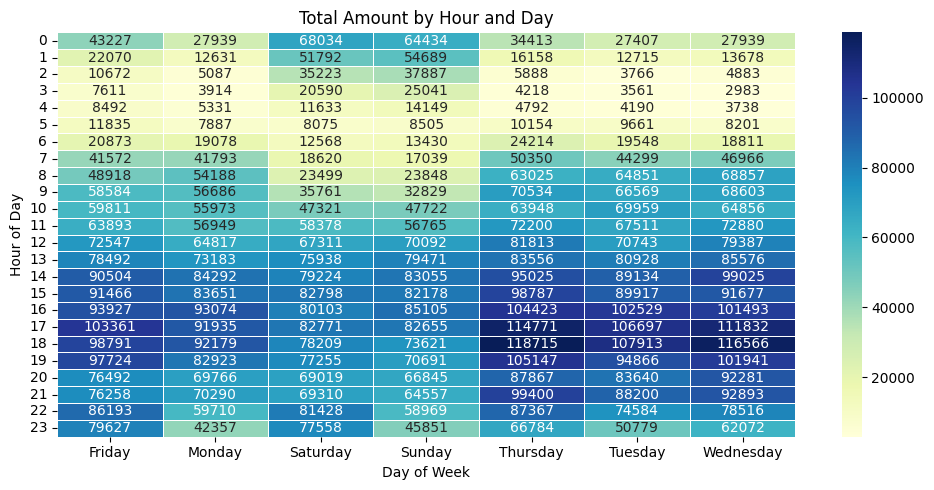

In [606]:
# Compare the average fare per mile for different days and for different times of the day


day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in day_names:
    trips_day = merged_df[merged_df['day_name'] == day]
    print(f"Total amount for {day} is {trips_day['total_amount'].sum():.2f}USD")

total_hours=merged_df['trip_duration'].sum()
total_fare_whole=merged_df['total_amount'].sum()
print(f"\nFare per hour is {total_fare_whole/total_hours:.2f} USD/hour")

day_hour_group = merged_df[['day_name', 'hour', 'total_amount']].groupby(['day_name', 'hour']).sum().reset_index()
#day_hour_group.value_counts()
pivot_table = day_hour_group.pivot(index='hour', columns='day_name', values='total_amount')

plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".0f")

plt.title("Total Amount by Hour and Day")
plt.ylabel("Hour of Day")
plt.xlabel("Day of Week")
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

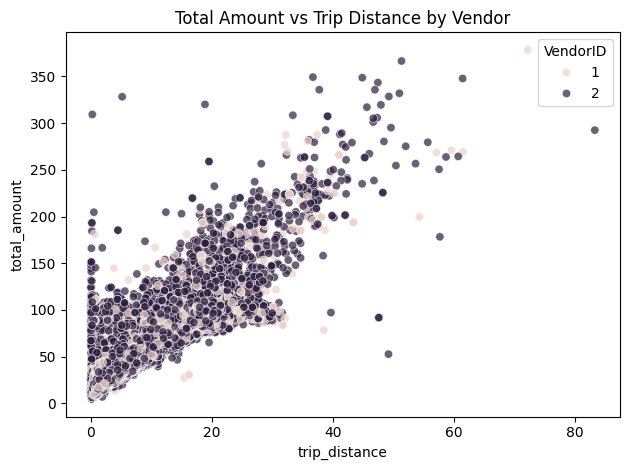

In [560]:
# Compare fare per mile for different vendors
distance_lessthan_100 = merged_df[merged_df['trip_distance'] < 100]

sns.scatterplot(
    data=distance_lessthan_100,
    x='trip_distance',
    y='total_amount',
    hue='VendorID',
    alpha=0.7
)
plt.title('Total Amount vs Trip Distance by Vendor')
plt.tight_layout()
plt.show()

pivot_table_2 = distance_lessthan_100.pivot_table(
    index='VendorID',               # Rows
    columns='trip_distance',        # Columns
    values='total_amount',          # Values to aggregate
    aggfunc='sum',                  # Aggregation function
    fill_value=0                    # Fill missing values with 0
)





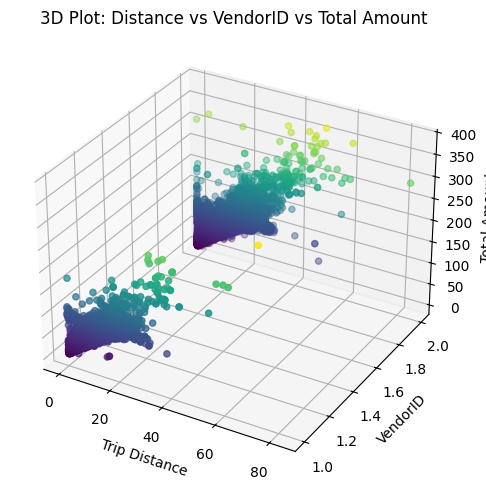

In [566]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    distance_lessthan_100['trip_distance'],
    distance_lessthan_100['VendorID'],
    distance_lessthan_100['total_amount'],
    c=distance_lessthan_100['total_amount'], cmap='viridis', s=20
)

ax.set_xlabel('Trip Distance')
ax.set_ylabel('VendorID')
ax.set_zlabel('Total Amount')
ax.set_title('3D Plot: Distance vs VendorID vs Total Amount')
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [571]:
# Defining distance tiers
two_miles=merged_df[merged_df['trip_distance']<2]
five_miles = merged_df[(merged_df['trip_distance'] >= 2) & (merged_df['trip_distance'] < 5)]
morethan_five=merged_df[merged_df['trip_distance']>5]

miles_totla_two_miles=two_miles['trip_distance'].sum()
miles_total_five_miles=five_miles['trip_distance'].sum()
miles_total_morethan_five=morethan_five['trip_distance'].sum()

amount_totla_two_miles=two_miles['total_amount'].sum()
amount_total_five_miles=five_miles['total_amount'].sum()
amount_total_morethan_five=morethan_five['total_amount'].sum()

average_two_miles=amount_totla_two_miles/miles_totla_two_miles
average_five_miles=amount_total_five_miles/miles_total_five_miles
average_morethan_five_miles=amount_total_morethan_five/miles_total_morethan_five

print("average fare per mile for distances upto 2 miles:",average_two_miles.round(2),"USD\mile")
print("\naverage fare per mile for distances upto 5 miles:",average_five_miles.round(2),"USD\mile")
print("\naverage fare per mile for distances morethan 5 miles:",average_morethan_five_miles.round(2),"USD\mile")


average fare per mile for distances upto 2 miles: 15.17 USD\mile

average fare per mile for distances upto 5 miles: 9.47 USD\mile

average fare per mile for distances morethan 5 miles: 5.82 USD\mile


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [572]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
merged_df.columns


Index(['VendorID', 'hour', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'trip_duration', 'total_airport_fee',
       'month', 'quarter', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'LocationID', 'borough', 'geometry', 'speed', 'day_name', 'trip_count',
       'dropoff_hour', 'pickup_hour'],
      dtype='object')

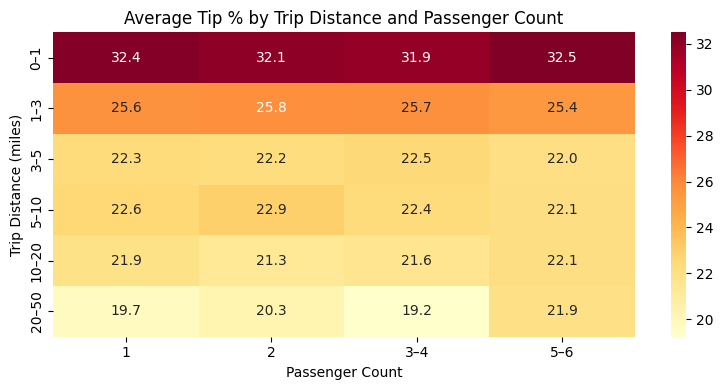

In [607]:
merged_df = merged_df[merged_df['fare_amount'] > 0]
merged_df['tip_percent'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100

# Bin trip distances
merged_df['distance_group'] = pd.cut(merged_df['trip_distance'], bins=[0, 1, 3, 5, 10, 20, 50], 
                                      labels=['0–1', '1–3', '3–5', '5–10', '10–20', '20–50'])

# Bin passenger counts
merged_df['passenger_group'] = pd.cut(merged_df['passenger_count'], 
                                      bins=[0, 1, 2, 4, 6], 
                                      labels=['1', '2', '3–4', '5–6'])

pivot_table_3 = merged_df.pivot_table(
    values='tip_percent',
    index='distance_group',
    columns='passenger_group',
    aggfunc='mean'
)

plt.figure(figsize=(8,4))
sns.heatmap(pivot_table_3, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Average Tip % by Trip Distance and Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Trip Distance (miles)")
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

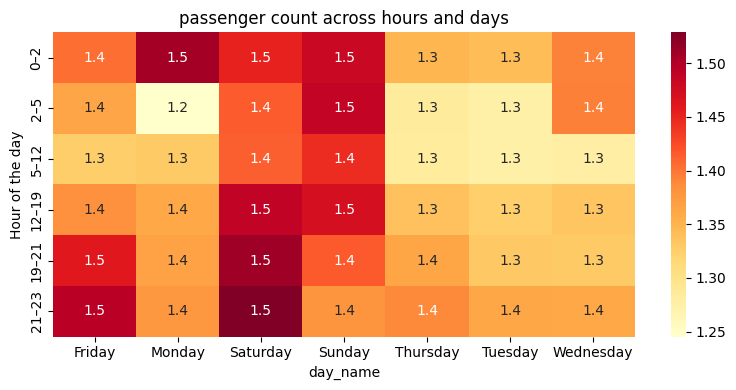

In [608]:
# See how passenger count varies across hours and days
merged_df['hour_group'] = pd.cut(merged_df['hour'], bins=[0, 2, 5, 12, 19, 21, 23], 
                                      labels=['0–2', '2–5', '5–12', '12–19', '19–21', '21–23'])

pivot_table_4 = merged_df.pivot_table(
    values='passenger_count',
    index='hour_group',
    columns='day_name',
    aggfunc='mean'
)

plt.figure(figsize=(8,4))
sns.heatmap(pivot_table_4, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("passenger count across hours and days")
plt.xlabel("day_name")
plt.ylabel("Hour of the day")
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

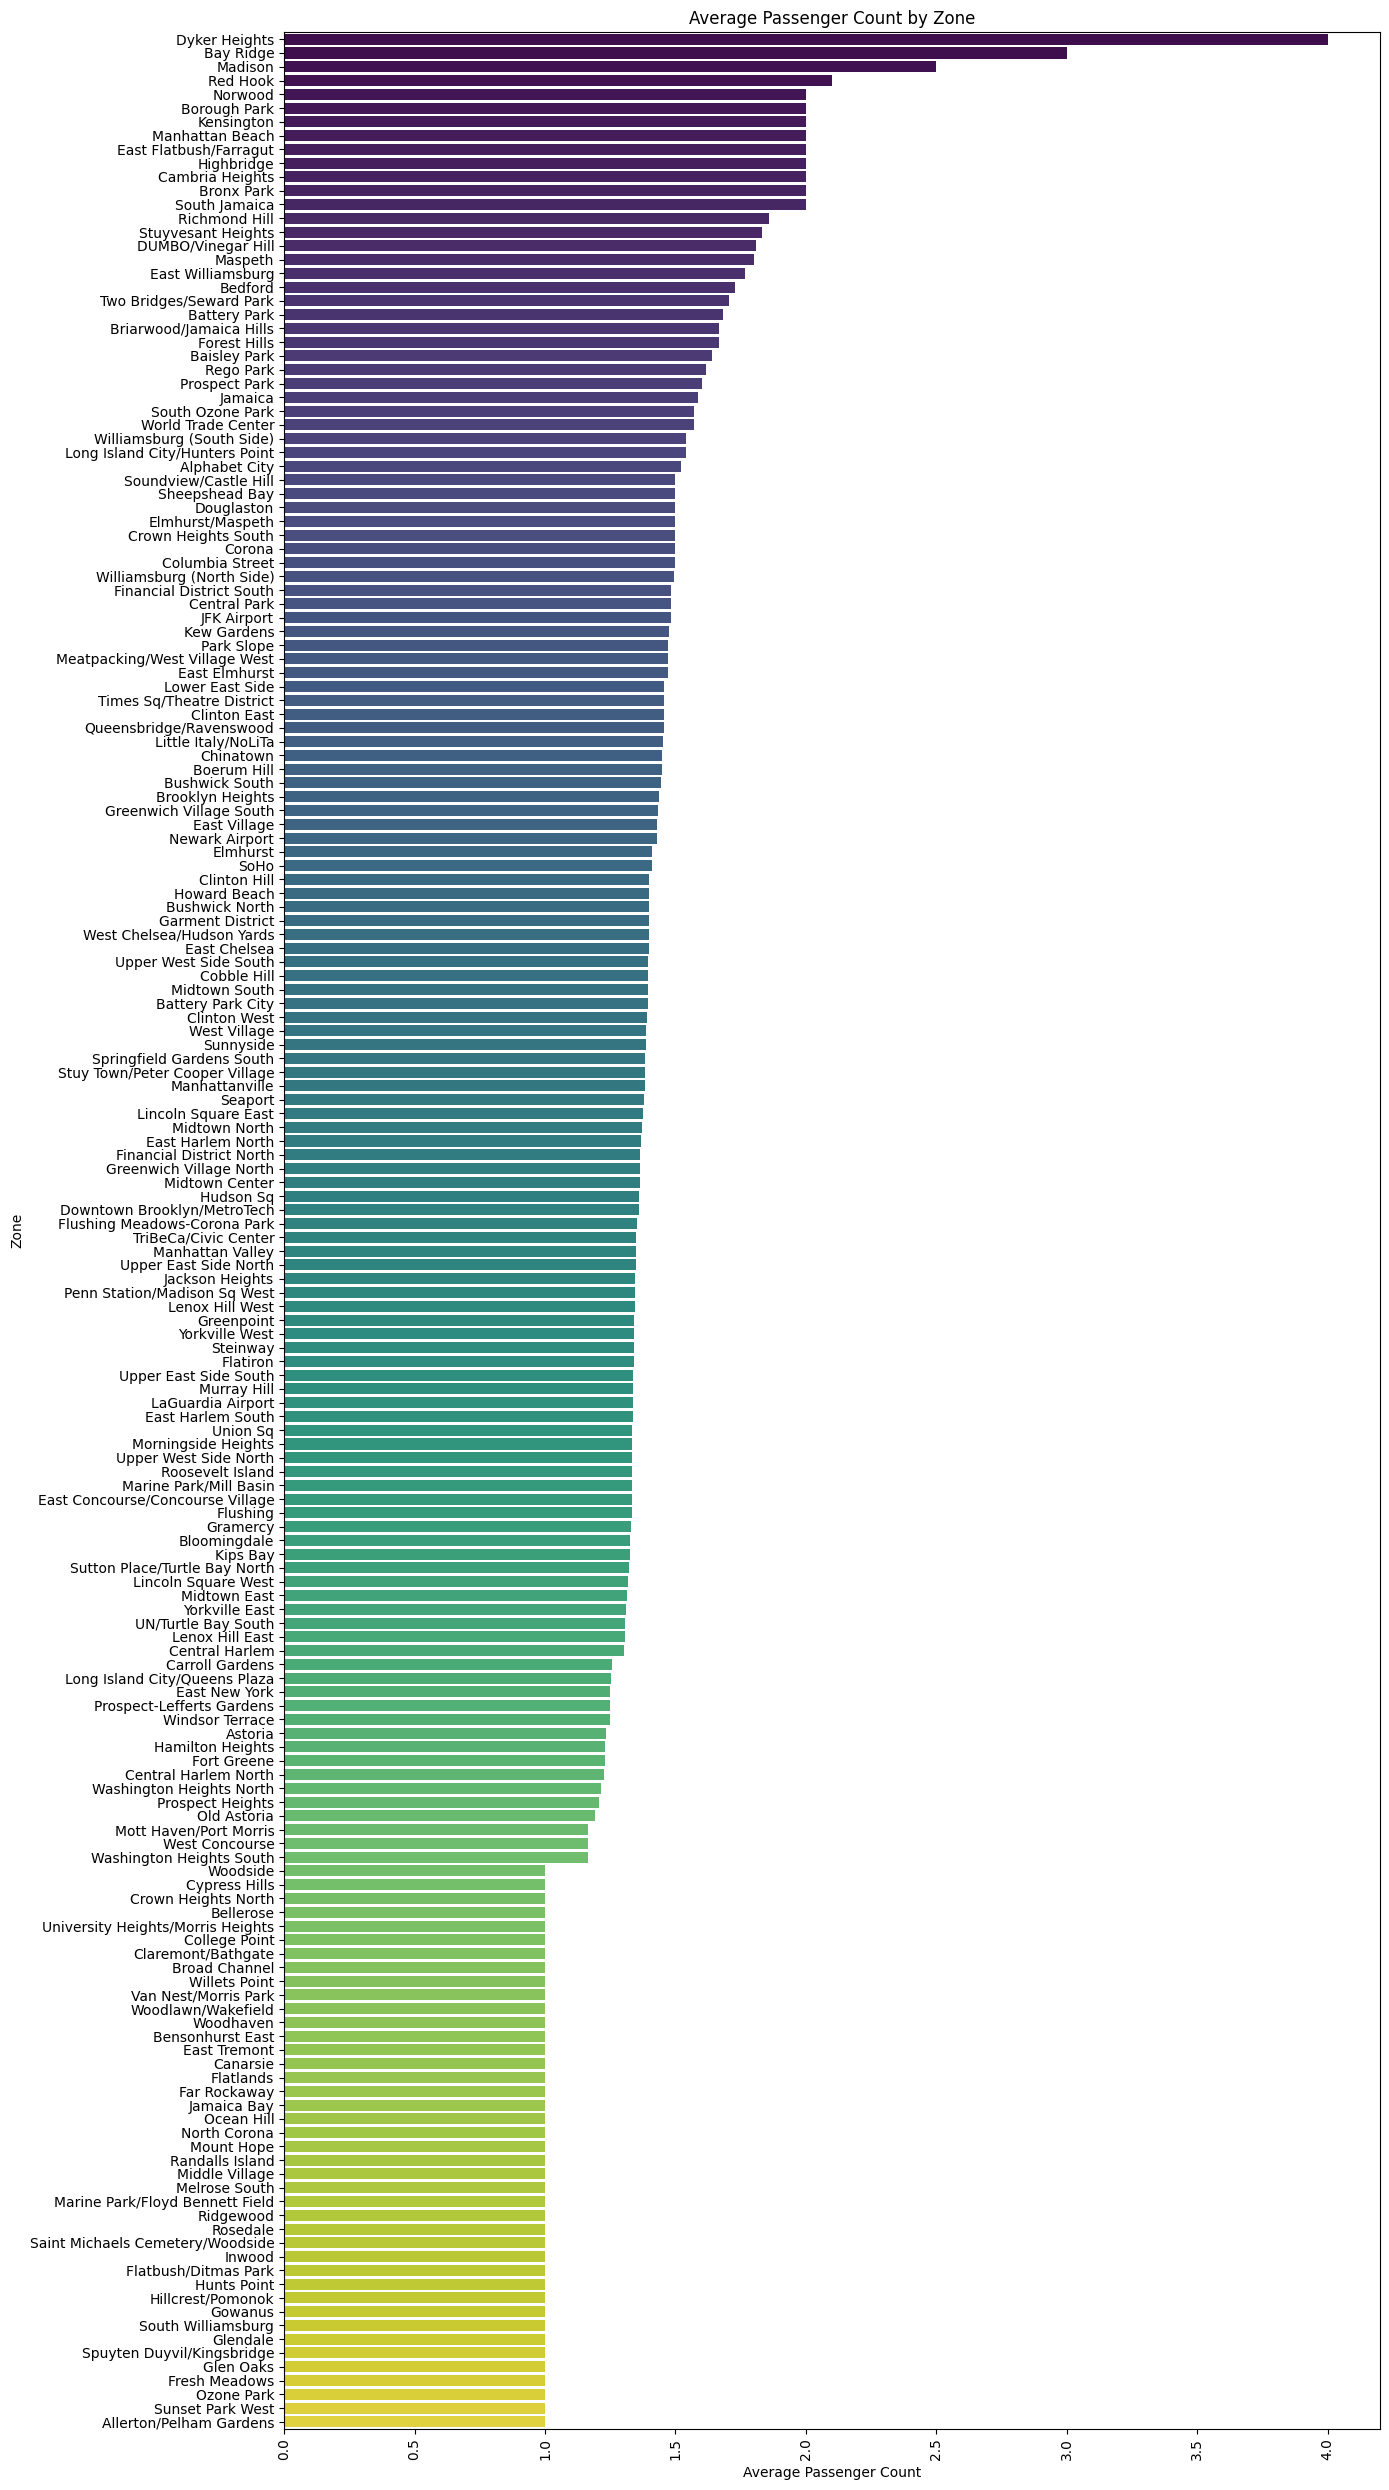

In [591]:
# How does passenger count vary across zones
zone_passenger_summary = merged_df.groupby('zone')['passenger_count'].agg(['mean', 'median', 'sum', 'count']).reset_index()
zone_passenger_summary = zone_passenger_summary.sort_values('mean', ascending=False)

plt.figure(figsize=(14, 25))
sns.barplot(data=zone_passenger_summary, x='mean', y='zone', palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Passenger Count by Zone')
plt.ylabel('Zone')
plt.xlabel('Average Passenger Count')
plt.tight_layout()
plt.show()


In [593]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_per_zone = merged_df.groupby('zone')['passenger_count'].mean().reset_index()
avg_passenger_per_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)


merged_df = merged_df.merge(avg_passenger_per_zone, on='zone', how='left')

merged_df.columns

Index(['VendorID', 'hour', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'trip_duration', 'total_airport_fee',
       'month', 'quarter', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'LocationID', 'borough', 'geometry', 'speed', 'day_name', 'trip_count',
       'dropoff_hour', 'pickup_hour', 'tip_percent', 'distance_group',
       'passenger_group', 'hour_group', 'avg_passenger_count_x',
       'avg_passenger_count_y'],
      dtype='object')

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [595]:
# How often is each surcharge applied?
print("improvement_surcharge")

merged_df['improvement_surcharge'].describe()



improvement_surcharge


count    330953.000000
mean          0.999588
std           0.017172
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: improvement_surcharge, dtype: float64

In [596]:
print("congestion_surcharge")

merged_df['congestion_surcharge'].describe()



congestion_surcharge


count    330953.000000
mean          2.371087
std           0.552867
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

In [597]:
print("extra")

merged_df['extra'].describe()

extra


count    330953.000000
mean          1.643726
std           1.838072
min           0.000000
25%           0.000000
50%           1.000000
75%           2.500000
max          14.250000
Name: extra, dtype: float64

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

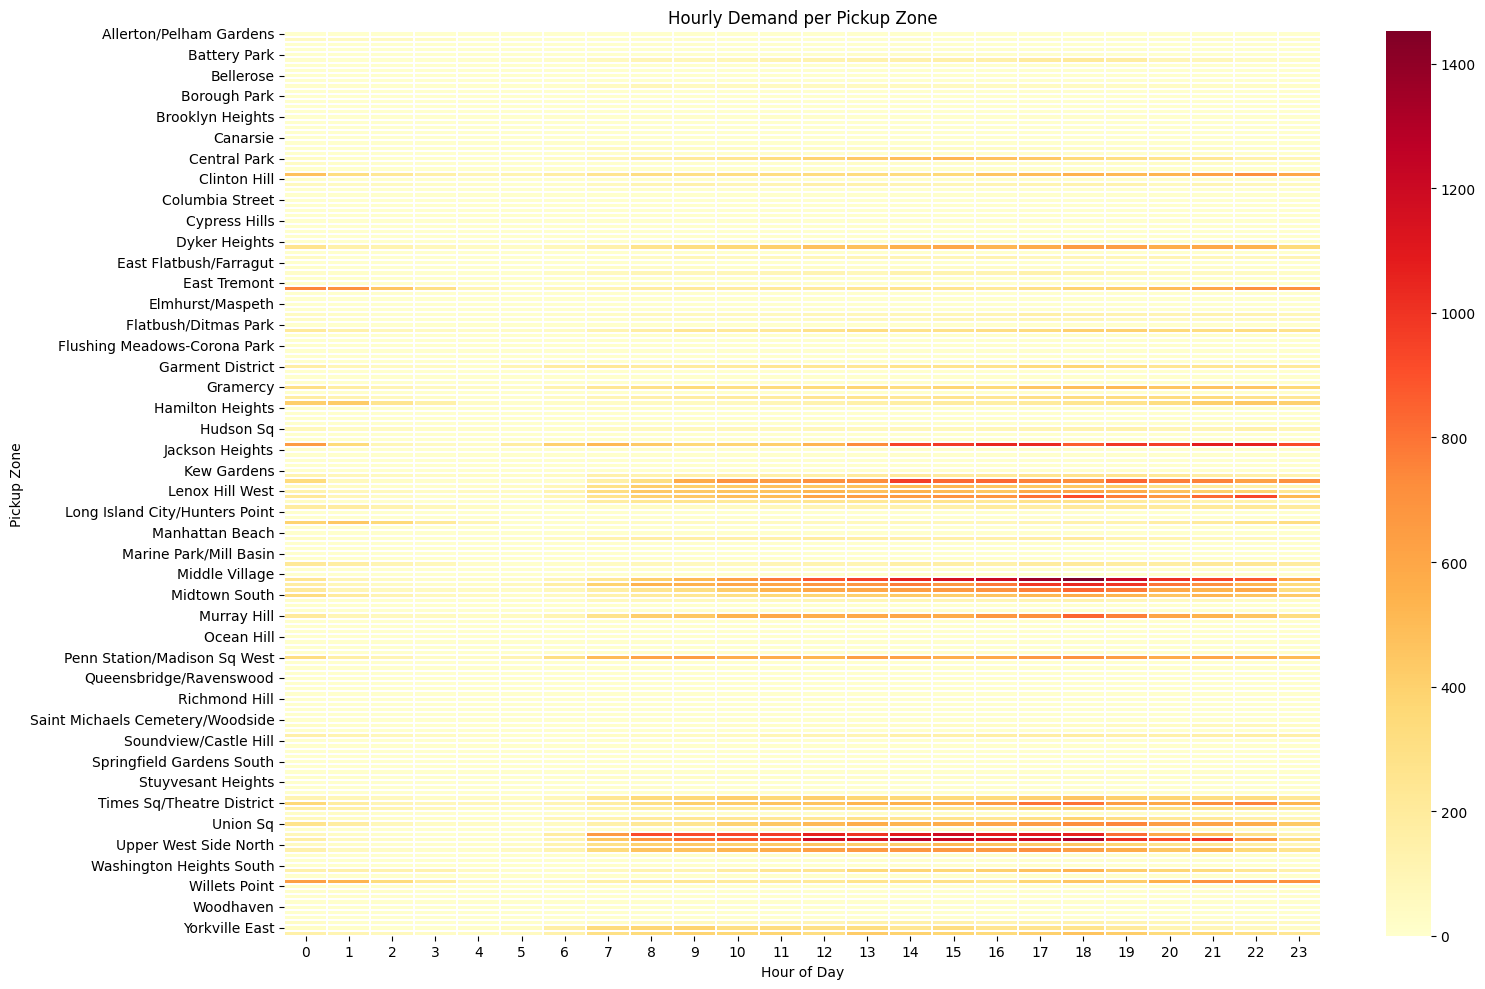

In [599]:
zone_hourly_demand = merged_df.groupby(['zone', 'hour']).size().reset_index(name='trip_count')


demand_pivot = zone_hourly_demand.pivot(index='zone', columns='hour', values='trip_count').fillna(0)


plt.figure(figsize=(16, 10))
sns.heatmap(demand_pivot, cmap='YlOrRd', linewidths=0.3)
plt.title('Hourly Demand per Pickup Zone')
plt.xlabel('Hour of Day')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

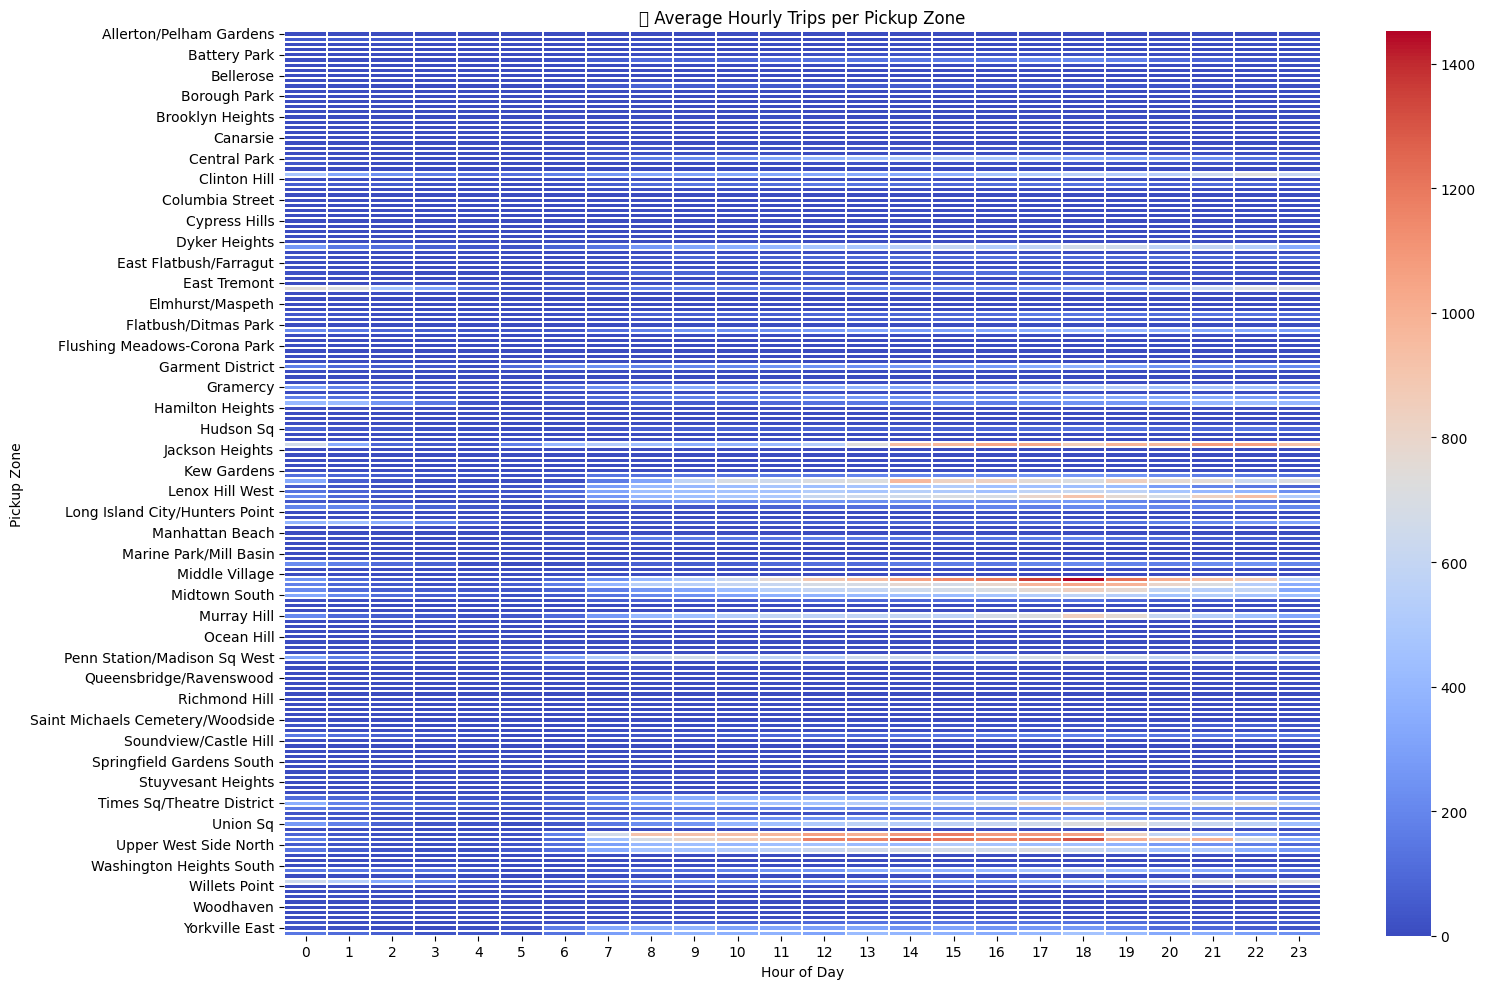

In [600]:
zone_time_group = merged_df.groupby(['zone', 'hour', 'day_name', 'month']).size().reset_index(name='trip_count')

zone_hour_avg = merged_df.groupby(['zone', 'hour'])['total_amount'].count().reset_index(name='avg_trips')

# --- Step 4: Pivot for heatmap visualization ---
heatmap_data = zone_hour_avg.pivot(index='zone', columns='hour', values='avg_trips').fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.3)
plt.title('🚖 Average Hourly Trips per Pickup Zone')
plt.xlabel('Hour of Day')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.